# CB AIML - Applied Data Science with Python
# Feature Engineering
### Project Statement
While searching for the dream house, the buyer looks at various factors, not just at the height of the basement ceiling or the proximity to an east-west railroad.

Using the dataset, find the factors that influence price negotiations while buying a house.

There are 79 explanatory variables describing every aspect of residential homes in Ames, Iowa.

### Perform the following steps:
#### 1. &nbsp; Understand the dataset:
   a. Identify the shape of the dataset  
   b. Identify variables with null values  
   c. Identify variables with unique values

### Import Libraries
- NumPy is the fundamental package for scientific computing in Python. 
- Pandas is a fast, powerful, flexible and easy to use Python data analysis and manipulation tool
- Matplotlib is a cross-platform, data visualization and graphical plotting library for Python
- Seaborn is a Python data visualization library based on matplotlib which is used for graphical statistical plotting

In [1]:
# Import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Load Data
Use the `pd.read_csv` function to read the *PEP1.csv* file into a pandas DataFrame

In [2]:
# Load the '311 Service Request' data set
df_fe = pd.read_csv('PEP1.csv')

### Explore the Data
#### 1.a &nbsp; Identify the shape of the dataset
Use `dataframe.shape` and `dataframe.info()` to check the shape and details of the dataset

In [3]:
df_fe.shape

(1460, 81)

In [4]:
df_fe.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Display number of numeric variables in DataFrame
numerical_count = len(df_fe.select_dtypes(include=np.number).columns.tolist())
categorical_count = df_fe.shape[1] - numerical_count
print('There are', df_fe.shape[1], 'variables in the dataset.')
print(categorical_count, 'categorical and', numerical_count, 'numerical variables.')

There are 81 variables in the dataset.
43 categorical and 38 numerical variables.


*********************************************************
##### The dataset has  
- 81 features (43 categorical and 38 numerical)
- 1460 observations
*********************************************************

#### 1.b &nbsp; Identify variables with null values
Get the variables (columns) with null (missing) values 
- The `dataframe.columns` returns the name of the columns in the dataframe.
- The `dataframe.isnull()` returns a dataframe of boolean values indicating `True` if corresponding field is null.
- The `dataframe.any()` returns a Series of boolean values indicating if any rows (axis=0) for the columns has null values. 
- With the combination of the 3 functions, the column labels in the dataframe which contains any null values will be returned. 

In [6]:
# Use df.columns function to get the list of column labels from the subset of variables that have missing values
null_cols = df_fe.columns[df_fe.isnull().any()]

# Get the total number of variables with null values
num_vars = len(null_cols)
print('Number of features (variables) with null values: ', num_vars)

# Get the count of numeric variables and find the count of categorical variables with missing values . 
num_count = len(df_fe[null_cols].select_dtypes(include=np.number).columns.tolist())
cat_count = num_vars - num_count
print('\t'*6, ' ', num_count, 'numerical and', cat_count, 'categorical')

# Display features that are of numeric values
print('\nNumerical column labels:', df_fe[null_cols].select_dtypes(include=np.number).columns.tolist())

# Display the column labels for the variables with missing values
print('\nVariables with missing (null) values:')
null_cols.tolist()

Number of features (variables) with null values:  19
						   3 numerical and 16 categorical

Numerical column labels: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

Variables with missing (null) values:


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

*********************************************************
##### The dataset has
- 19 features with missing values: 
    - 3 numerical features: [`LotFrontage`], [`MasVnrArea`], [`GarageYrBlt`]
    - 16 categorical features: [`Alley`], [`MasVnrType`], [`BsmtQual`], [`BsmtCond`], [`BsmtExposure`], [`BsmtFinType1`], [`BsmtFinType2`], [`Electrical`], [`FireplaceQu`], [`GarageType`], [`GarageFinish`], [`GarageQual`], [`GarageCond`], [`PoolQC`], [`Fence`],[`MiscFeature`]

The target variable is [`SalePrice`]
*********************************************************
Find the percentage of missing values for each of the 19 features in descending order.

In [7]:
# Percentage of missing values
df_fe[null_cols].isnull().mean().sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

*********************************************************
- 2 variables, [`PoolQC`] and [`MiscFeature`], have more than 95% missing values. Consider dropping them.
- We will determine imputation for the other variables after further analysis.
*********************************************************
#### 1.c &nbsp; Identify variables with unique values
- Use the `dataframe.nunique()` function to get the number of unique values for each feature in the dataset
- Sort the result in descending order
- pandas could not display all 81 variables with the number of unique values so use the `dict()` function to show the result as a dictionary with variable as the key and the number of unique values as the value.

In [8]:
# Constant features - unique values
print('Variable: Number of unique values')
dict(df_fe.nunique().sort_values(ascending=False))

Variable: Number of unique values


{'Id': 1460,
 'LotArea': 1073,
 'GrLivArea': 861,
 'BsmtUnfSF': 780,
 '1stFlrSF': 753,
 'TotalBsmtSF': 721,
 'SalePrice': 663,
 'BsmtFinSF1': 637,
 'GarageArea': 441,
 '2ndFlrSF': 417,
 'MasVnrArea': 327,
 'WoodDeckSF': 274,
 'OpenPorchSF': 202,
 'BsmtFinSF2': 144,
 'EnclosedPorch': 120,
 'YearBuilt': 112,
 'LotFrontage': 110,
 'GarageYrBlt': 97,
 'ScreenPorch': 76,
 'YearRemodAdd': 61,
 'Neighborhood': 25,
 'LowQualFinSF': 24,
 'MiscVal': 21,
 '3SsnPorch': 20,
 'Exterior2nd': 16,
 'MSSubClass': 15,
 'Exterior1st': 15,
 'TotRmsAbvGrd': 12,
 'MoSold': 12,
 'OverallQual': 10,
 'Condition1': 9,
 'OverallCond': 9,
 'SaleType': 9,
 'PoolArea': 8,
 'RoofMatl': 8,
 'HouseStyle': 8,
 'BedroomAbvGr': 8,
 'Condition2': 8,
 'Functiol': 7,
 'GarageType': 6,
 'SaleCondition': 6,
 'Heating': 6,
 'BsmtFinType2': 6,
 'BsmtFinType1': 6,
 'RoofStyle': 6,
 'Foundation': 6,
 'GarageQual': 5,
 'YrSold': 5,
 'GarageCars': 5,
 'GarageCond': 5,
 'FireplaceQu': 5,
 'HeatingQC': 5,
 'LotConfig': 5,
 'BldgType':

*********************************************************
- [`Id`] has as many unique values as there are observations in our dataset; judging by the name of the variable, this may be ordinal with no significance and we may have to drop it.
- The variables with the most unique values are mainly those that are specifying area or size in square feet or linear feet. Since these variables are numeric values, there is no need to look at its unique values
- The [`YearBuilt`], [`YearRemodAdd`] and [`GarageYrBlt`] variables has more than 50 unique values; The values will be just showing the year that the properties were built or updated.
- The [`SalePrice`] is the target variable.

*********************************************************
Let's take a look at the [`Id`], [`YearBuilt`], [`YearRemodAdd`], [`GarageYrBlt`] variables and all the other variables that have 25 or lesser unique values (i.e., excluding the variables that specify area or size).

In [9]:
# Get the list of column names that have less than or equal to 25 unique values
unique_list = ['Id', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
unique_dict = dict(df_fe.nunique().sort_values(ascending=False))
keys = unique_dict.keys()

for key in keys:
    value = unique_dict.get(key)
    if value <= 25:
        unique_list.append(key)

In [10]:
# Get the unique values for the list of variables with 25 or lesser unique values
print("_" * 95)

for col in df_fe.columns:
    if col in unique_list:
        print(col, '(', df_fe[col].dtype, ') :', df_fe[col].unique())
        print("_" * 95)

_______________________________________________________________________________________________
Id ( int64 ) : [   1    2    3 ... 1458 1459 1460]
_______________________________________________________________________________________________
MSSubClass ( int64 ) : [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
_______________________________________________________________________________________________
MSZoning ( object ) : ['RL' 'RM' 'C (all)' 'FV' 'RH']
_______________________________________________________________________________________________
Street ( object ) : ['Pave' 'Grvl']
_______________________________________________________________________________________________
Alley ( object ) : [nan 'Grvl' 'Pave']
_______________________________________________________________________________________________
LotShape ( object ) : ['Reg' 'IR1' 'IR2' 'IR3']
_______________________________________________________________________________________________
LandContour ( o

- [`Id`] has ordinal values and has no significance so we can drop it. 
- [`Street`] and [`Alley`] have similar unique values - ['Pave' 'Grvl'])
- Except for [`OverallQual`] and [`OverallCond`], the quality and condition variables, [`ExterQual`], [`ExterCond`], [`BsmtQual`], [`BsmtCond`], [`HeatingQC`], [`KitchenQual`], [`FireplaceQu`], [`GarageQual`] , [`GarageCond`] and [`PoolQC`], have similar unique values - ['TA' 'Gd' 'Fa' 'Po' 'Ex']
- The [`OverallQual`] and [`OverallCond`] have numerical ratings.
- The [`GarageYrBlt`] variable is of dtype float64 instead of int64. It has null values so cannot convert to int64 type until the missing values are handled.

*********************************************************
#### 2. Generate a separate dataset for numerical and categorical variables

To prepare the dataset for imputation, we need to split it into `train` and `validation` datasets.  
The split need to be done before separating the dataset for numerical and categorical variables otherwise when we merge the numerical and categorical variables back into one dataset, the values of the numerical and categorical variables might be mismatched.
1. Split the dataset into `train` and `validation`.
2. Separate the `train` datasets into numerical and categorical datasets.
3. Separate the `validation` datasets into numerical and categorical datasets

**Note**: Drop the [`Id`] variable since it has ordinal values and has no significance. Drop the [`PoolQC`] and [`MiscFeature`] since they have more than 95% missing values so have no significance. `SalePrice` is the target variable.

In [11]:
# Split dataset to train and validation
from sklearn.model_selection import train_test_split

y = df_fe['SalePrice']
X = df_fe.drop(columns=['SalePrice', 'Id', 'PoolQC', 'MiscFeature'])

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

In [12]:
# Generate the dataset with numerical variables
numerical_df = X_train.select_dtypes(include=[np.number])
numerical_cols = numerical_df.columns
print('Numerical dataset features:\n', numerical_cols.to_list(), '\n')

# Generate the dataset with categorical variables
categorical_df = X_train.select_dtypes(exclude=[np.number])
categorical_cols = categorical_df.columns
print('Categorical dataset features:\n', categorical_cols.to_list())

# Generate the validation dataset for numerical variables as well
num_val_df = X_val.select_dtypes(include=[np.number])

# Generate the validation dataset for categorical variables as well
cat_val_df = X_val.select_dtypes(exclude=[np.number])

Numerical dataset features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'] 

Categorical dataset features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functiol', 'FireplaceQ

*********************************************************
#### 3. EDA of numerical variables:
   a. Missing value treatment  
   b. Identify the skewness and distribution  
   c. Identify significant variables using a correlation matrix  
   d. Pair plot for distribution and density  

#### 3.a &nbsp; Missing value treatment
There are 3 numerical features, [`LotFrontage`], [`MasVnrArea`], and [`GarageYrBlt`] with missing values.
- Use the median to impute missing values for the [`LotFrontage`] and [`MasVnrArea`] variables.
- Since missing value for the variable [`GarageYrBlt`] indicates that the garage was not built, impute the missing value with year 1000 to indicate garage was not built with a invalid year.
- Validate that all missing value had been imputed.

In [13]:
# Imppute missing value with the median of the feature values
from feature_engine.imputation import MeanMedianImputer

# set up the imputer
median_imputer = MeanMedianImputer(
                   imputation_method='median',
                   variables=['LotFrontage', 'MasVnrArea']
                   )

# fit the imputer
median_imputer.fit(numerical_df)

# transform the data
numerical_df = median_imputer.transform(numerical_df)
num_val_df = median_imputer.transform(num_val_df)

In [14]:
# Imppute missing value with the arbitrary value of 1000 for the 'GarageYrBlt' feature 
from feature_engine.imputation import ArbitraryNumberImputer

# set up the imputer
arbitrary_imputer = ArbitraryNumberImputer(
                      arbitrary_number=1000,
                      variables=['GarageYrBlt'],
                      )
# fit the imputer
arbitrary_imputer.fit(numerical_df)

# transform the data
numerical_df = arbitrary_imputer.transform(numerical_df)
num_val_df = arbitrary_imputer.transform(num_val_df)

In [15]:
# Validate that missing values for the 3 numerical variables had been imputed.
numerical_df[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

- The `MeanMedianImputer` from the *feature_engine.imputation* package had been used to impute missing values with the median of the feature for the [`LotFrontage`] and [`MasVnrArea`] variables.
- The `ArbitraryNumberImputer` from the *feature_engine.imputation* package had been used to impute missing values with the arbitrary value of 1000 for the [`GarageYrBlt`] variable.
- After the imputation, validation using the `.isnull().sum()` to check if there are any missing values shows that the imputation was completed, that is, there are no more missing values.

*********************************************************
Convert the [`GarageYrBlt`] values from float to integer, as year value should be represented as integer. 

In [16]:
numerical_df['GarageYrBlt'].dtype

dtype('float64')

In [17]:
numerical_df['GarageYrBlt'] = numerical_df['GarageYrBlt'].astype(np.int64)
num_val_df['GarageYrBlt'] = num_val_df['GarageYrBlt'].astype(np.int64)
num_val_df['GarageYrBlt'].dtype

dtype('int64')

#### 3.b &nbsp; Identify the skewness and distribution
Use the `.skew()` function to identify the skewness of the distributions.

In [18]:
# Use the .skew() function with parameters (axis=0) to find the skewness for each column. 
# Sort result in descending order 
numerical_df.skew(axis=0).sort_values(ascending=False)

MiscVal          17.139846
PoolArea         13.933440
LotArea          11.706708
3SsnPorch         9.734544
LowQualFinSF      9.081859
KitchebvGr        4.399349
BsmtFinSF2        4.265058
ScreenPorch       4.036489
BsmtHalfBath      4.010690
EnclosedPorch     3.273954
LotFrontage       2.709042
MasVnrArea        2.249670
OpenPorchSF       2.237532
BsmtFinSF1        1.935177
TotalBsmtSF       1.775314
WoodDeckSF        1.602741
1stFlrSF          1.463001
GrLivArea         1.454846
MSSubClass        1.423915
BsmtUnfSF         0.915489
2ndFlrSF          0.798859
OverallCond       0.683393
TotRmsAbvGrd      0.682204
HalfBath          0.625458
Fireplaces        0.617483
BsmtFullBath      0.616903
BedroomAbvGr      0.273210
MoSold            0.245125
OverallQual       0.158744
GarageArea        0.131587
YrSold            0.086425
FullBath          0.074028
GarageCars       -0.417381
YearRemodAdd     -0.504942
YearBuilt        -0.616608
GarageYrBlt      -3.918228
dtype: float64

In [19]:
# Use original dataset to see the influence the imputed Missing values had on the features with missing values. 
df_fe[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].skew(axis=0, skipna=True)

LotFrontage    2.163569
MasVnrArea     2.669084
GarageYrBlt   -0.649415
dtype: float64

[`MiscVal`], [`PoolArea`], [`LotArea`], [`3SsnPorch`], and [`LowQualFinSF`] have highly right skewed distributions with a long right tail (skewness from 9.081859 to 17.139846).

[`KitchebvGr`], [`BsmtFinSF2`], [`ScreenPorch`], [`BsmtHalfBath`], [`EnclosedPorch`], [`LotFrontage`], [`MasVnrArea`], [`OpenPorchSF`],[`BsmtFinSF1`], [`TotalBsmtSF`], [`WoodDeckSF`], [`1stFlrSF`], [`GrLivArea`], and [`MSSubClass`] have right skewed distributions (skewness from 1.423915 to 4.399349).  

[`BsmtUnfSF`], [`2ndFlrSF`], [`OverallCond`], [`TotRmsAbvGrd`], [`HalfBath`], [`Fireplaces`], [`BsmtFullBath`], [`BedroomAbvGr`], [`MoSold`], [`OverallQual`],[`GarageArea`], [`YrSold`], and [`FullBath`] have slightly right skewed distributions (skewness from 0.074028 to 0.915489).

[`YearBuilt`], [`YearRemodAdd`], and [`GarageCars`] have slightly left skewed distributions (skewness from -0.616608 to -0.417381).

Due to using value of '1000' to fill the *Missing* values, the skewness of the [`GarageYrBlt`] variable has a left skewness of -3.918228. If the *Missing* value had not been replaced and just use `skipna=True` as a parameter with the `.skew()` function, the skewness will only be around -0.649415.

*********************************************************
The skewness and distribution of the features can be seen from the result using `dataframe.describe()` to check the statistical information. It also can be seen from `kde` plot.

In [20]:
# Display the transposed statistical information for the features in the dataframe
df_fe.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchebvGr     1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchebvGr          1.0       1.00       3.0  
T

The statistical data above can be used to estimate the skewness and distribution of the variables.

*********************************************************
The *Skewness and Distribution* of the variables can also be visualized using `kde` or `histogram` plots.

- Visualize the skewness and distribution for the `MiscVal` which is a highly right skewed distribution.
- Visualize the skewness and distribution for the `GrLivArea` which is a right skewed distribution.
- Visualize the skewness and distribution for the `GarageCars` which is a slighly left skewed distribution.

<AxesSubplot:xlabel='GarageCars', ylabel='Density'>

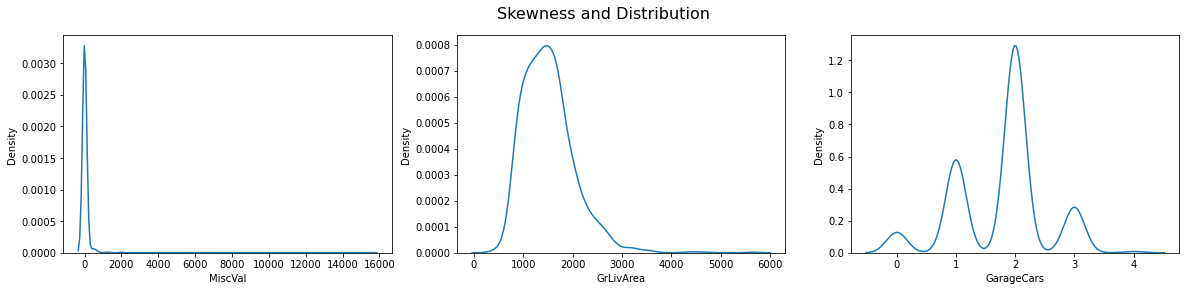

In [21]:
# Plot a highly right skewed, right skewed and a slightly left skewed distributions for 3 features with subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Add a overall title
fig.suptitle('Skewness and Distribution', fontsize=16)

# Display 'kde' plots for 'MiscVal', 'GrLivArea' and 'GarageCars' variables
sns.kdeplot(df_fe['MiscVal'], ax=axes[0])
sns.kdeplot(df_fe['GrLivArea'], ax=axes[1])
sns.kdeplot(df_fe['GarageCars'], ax=axes[2])

*********************************************************
#### 3.c &nbsp; Identify significant variables using a correlation matrix
We want to look at the correlations between the target variable `SalePrice` and the other variables in the dataset. So, before creating the correlation matrix, let's add the `SalePrice` back onto the dataset, save result to a new dataframe.
- Add the `SalePrice` to the dataset and save as `num_df`
- Create a correlation matrix using the `.corr` function
- Plot a heatmap for the correlation matrix; round off to 2 decimal for a cleaner display
- Identify significant variables from the matrix

In [22]:
# Use .corr() function to get a correlation matrix
num_df = numerical_df.copy()
num_df['SalePrice'] = y_train

corr_matrix = num_df.corr(method='pearson')
corr_matrix

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.345587 -0.114885     0.033643    -0.051452   
LotFrontage     -0.345587     1.000000  0.297833     0.228969    -0.040906   
LotArea         -0.114885     0.297833  1.000000     0.099322     0.003762   
OverallQual      0.033643     0.228969  0.099322     1.000000    -0.083437   
OverallCond     -0.051452    -0.040906  0.003762    -0.083437     1.000000   
YearBuilt        0.000084     0.111827  0.009906     0.562225    -0.380957   
YearRemodAdd     0.029745     0.092014  0.019718     0.544446     0.046364   
MasVnrArea      -0.013149     0.194993  0.127069     0.424824    -0.138211   
BsmtFinSF1      -0.074653     0.222225  0.229307     0.210886    -0.043705   
BsmtFinSF2      -0.065171     0.060053  0.126493    -0.046931     0.055532   
BsmtUnfSF       -0.134089     0.113666 -0.016504     0.328416    -0.148196   
TotalBsmtSF     -0.233992     0.363982  0.263865     0.530420    -0.174357   
1stFlrSF        -0.243527     0.410649  0.299800     0.465236    -0.133731   
2ndFlrSF         0.309876     0.066989  0.054832     0.291625     0.040968   
LowQualFinSF     0.064478     0.026390  0.006522    -0.021715     0.024320   
GrLivArea        0.086320     0.359846  0.266481     0.583244    -0.061641   
BsmtFullBath     0.005730     0.086580  0.177218     0.102389    -0.054837   
BsmtHalfBath    -0.020686    -0.011055  0.054500    -0.059776     0.115851   
FullBath         0.153533     0.175069  0.116876     0.537249    -0.175725   
HalfBath         0.158213     0.045064  0.020887     0.269046    -0.055375   
BedroomAbvGr    -0.007063     0.222031  0.116996     0.083483     0.025958   
KitchebvGr       0.294669     0.002643 -0.021146    -0.181098    -0.064819   
TotRmsAbvGrd     0.059456     0.303382  0.188962     0.424241    -0.037997   
Fireplaces      -0.042817     0.234989  0.272990     0.394505    -0.007383   
GarageYrBlt     -0.050716     0.096976  0.065210     0.313407    -0.015566   
GarageCars      -0.035067     0.255702  0.152010     0.592032    -0.159838   
GarageArea      -0.091598     0.316246  0.180065     0.547868    -0.135613   
WoodDeckSF      -0.009264     0.064580  0.179031     0.234837    -0.000820   
OpenPorchSF     -0.010184     0.130583  0.082588     0.274991    -0.044830   
EnclosedPorch   -0.017412     0.005962 -0.022871    -0.113371     0.055016   
3SsnPorch       -0.057950     0.064376  0.022321     0.026110     0.026604   
ScreenPorch     -0.040645     0.050047  0.046442     0.057118     0.060584   
PoolArea         0.003224     0.213575  0.086462     0.081412    -0.006774   
MiscVal          0.025378    -0.000139  0.058246    -0.054495     0.047234   
MoSold          -0.003272     0.025564  0.004401     0.060533     0.005463   
YrSold          -0.030060    -0.000056 -0.005108    -0.023303     0.023235   
SalePrice       -0.089014     0.310371  0.265577     0.785016    -0.076693   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.000084      0.029745   -0.013149   -0.074653   -0.065171   
LotFrontage     0.111827      0.092014    0.194993    0.222225    0.060053   
LotArea         0.009906      0.019718    0.127069    0.229307    0.126493   
OverallQual     0.562225      0.544446    0.424824    0.210886   -0.046931   
OverallCond    -0.380957      0.046364   -0.138211   -0.043705    0.055532   
YearBuilt       1.000000      0.597193    0.320719    0.225073   -0.052704   
YearRemodAdd    0.597193      1.000000    0.170068    0.113075   -0.058394   
MasVnrArea      0.320719      0.170068    1.000000    0.242470   -0.077757   
BsmtFinSF1      0.225073      0.113075    0.242470    1.000000   -0.041082   
BsmtFinSF2     -0.052704     -0.058394   -0.077757   -0.041082    1.000000   
BsmtUnfSF       0.181246      0.197734    0.155404   -0.492554   -0.202824   
TotalBsmtSF     0.395558      0.294574    0.378919    0.523692    0.101054   
1stFlrSF        0.272774      0.2448

<AxesSubplot:>

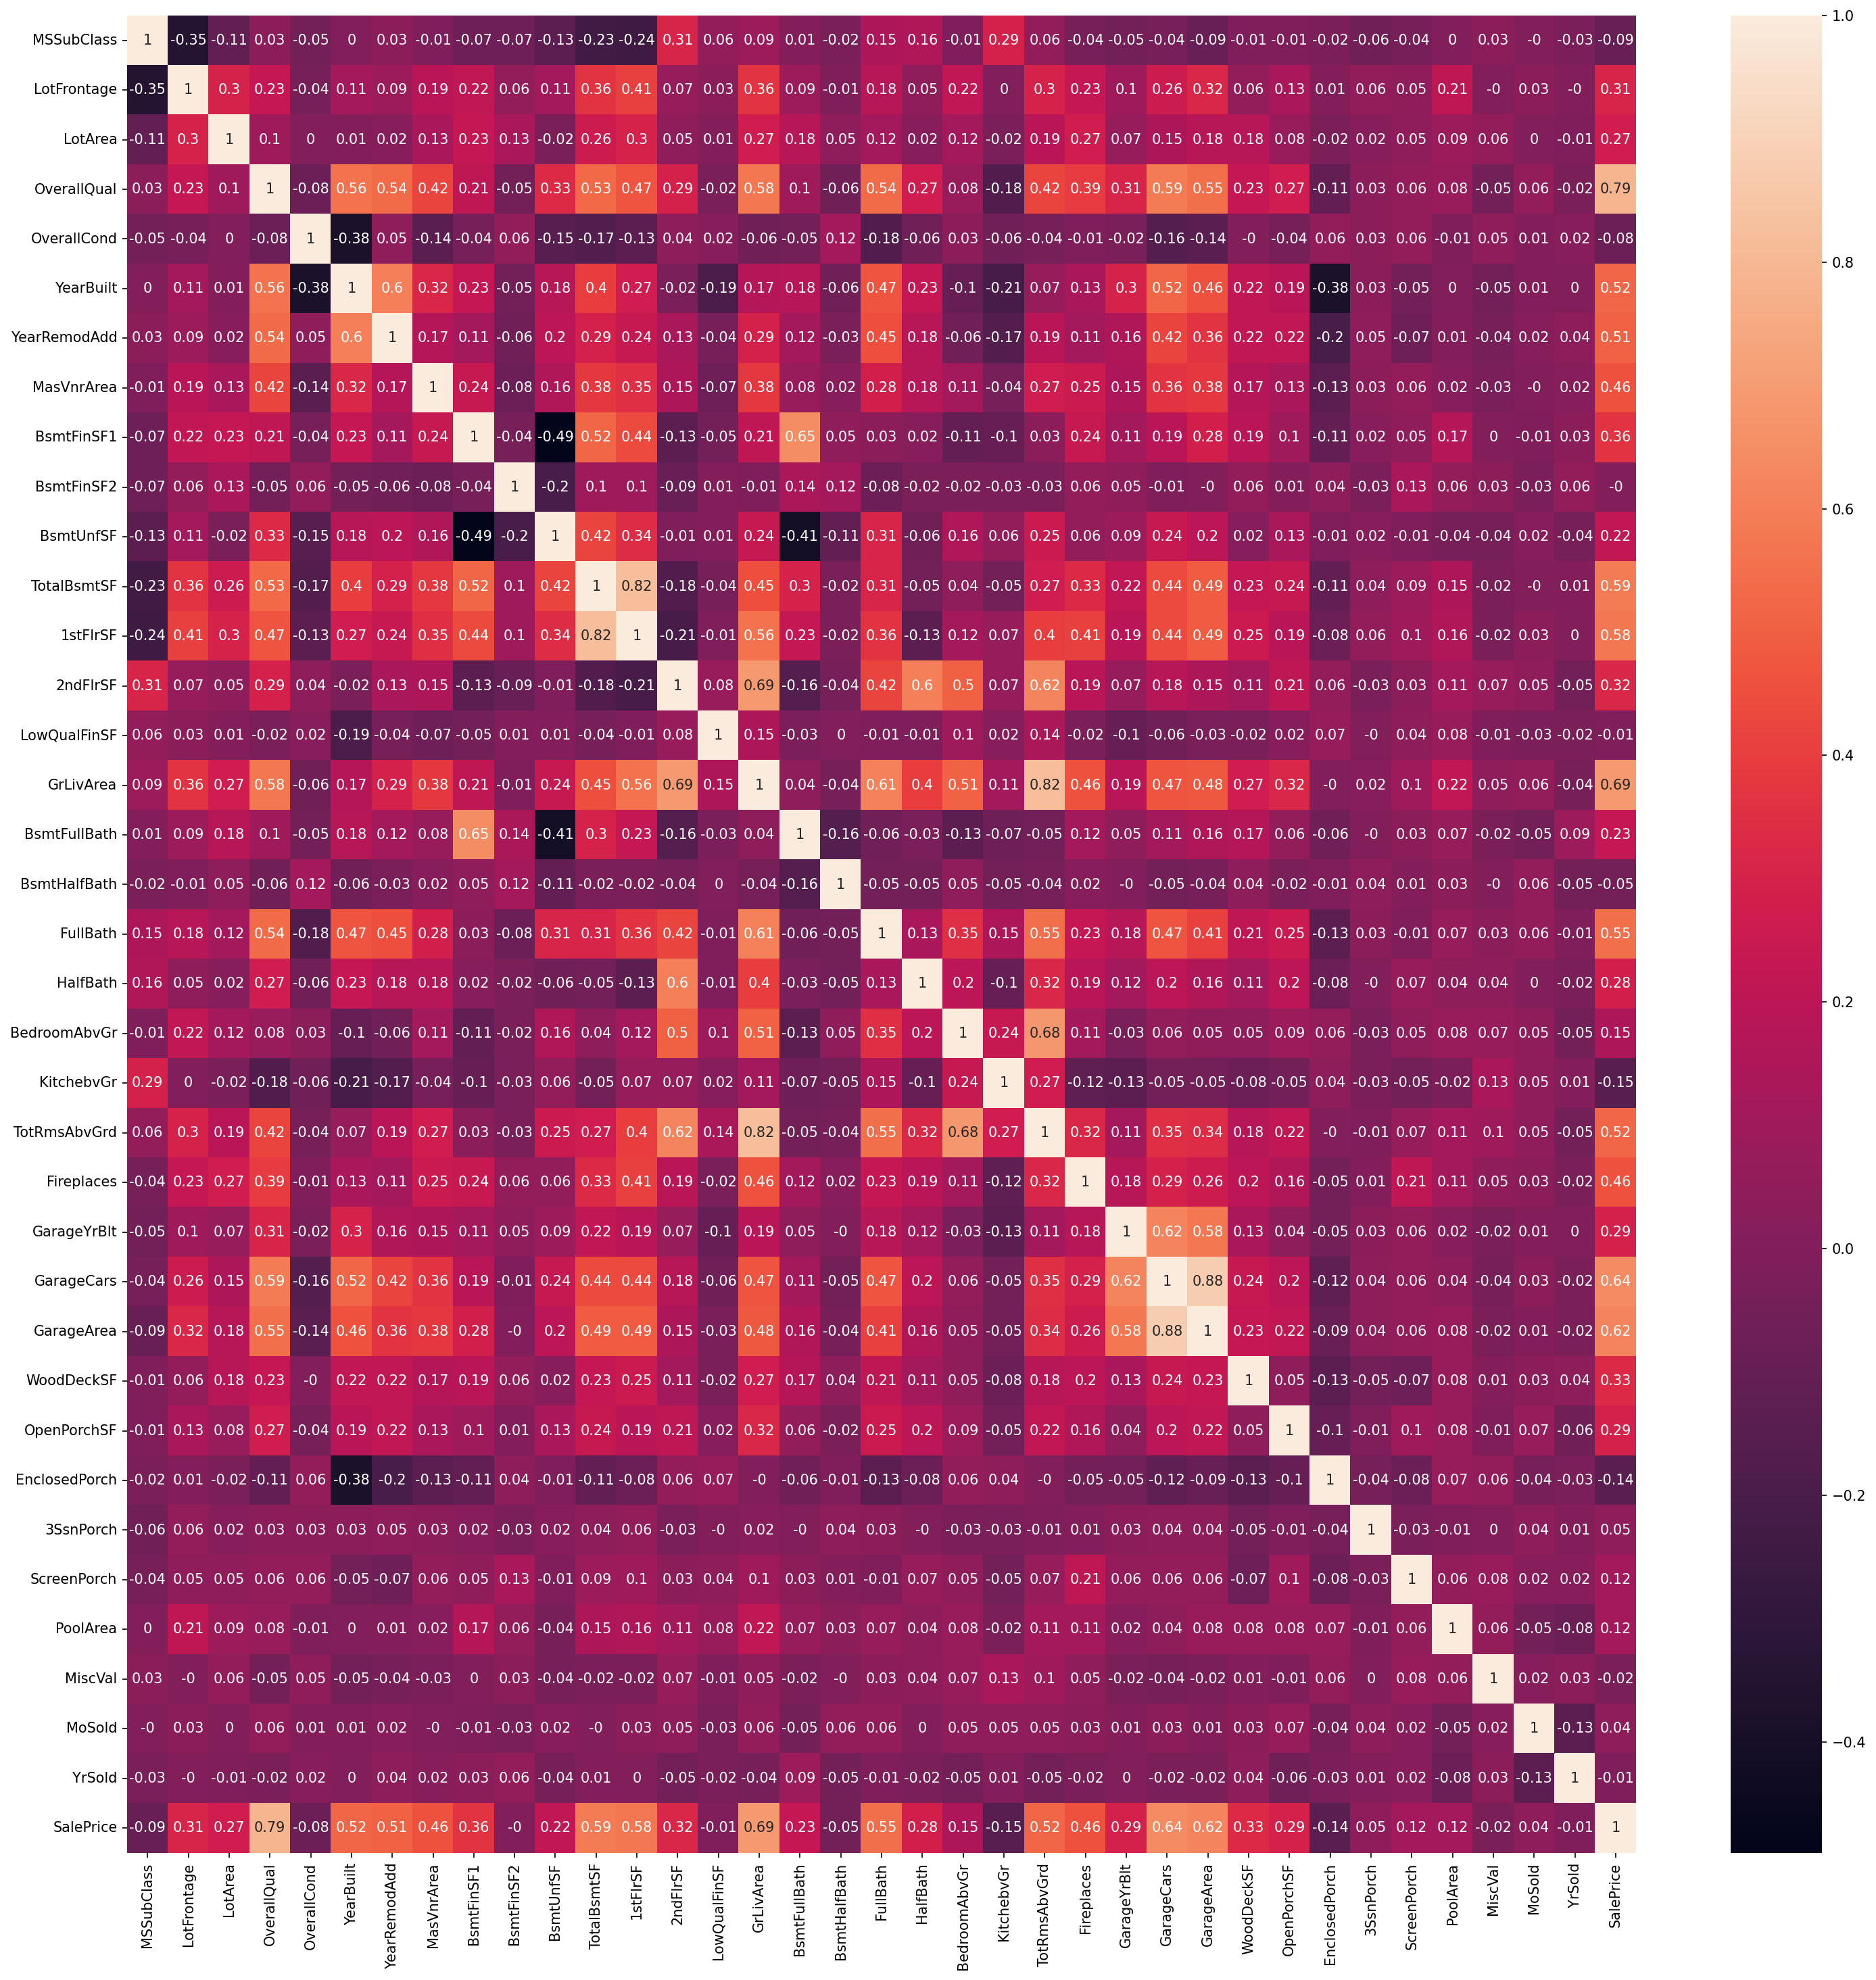

In [23]:
# Display the correlation matrix in a heatmap
plt.figure(figsize= (24,24), dpi=150)
sns.heatmap(corr_matrix.round(2), annot=True)

##### Identify significant variables from the matrix
- `1stFlrSF` and `TotalBsmtSF` are highly correlated (0.82). We can just keep **`TotalBsmtSF`** since it is more correlated with `SalePrice` (0.59).
- `TotRmsAbvGrd` and `GrLivArea` are highly correlated (0.82). We can just keep **`GrLivArea`** since it is more correlated with `SalePrice` (0.69).
- `GarageCars` and `GarageArea` are highly correlated (0.88). We can just keep **`GarageCars`** since it is more correlated with `SalePrice` (0.64).
- `YearBuilt` and `YearRemodAdd` are correlated (0.6). We can just keep **`YearBuilt`** since it is more correlated with `SalePrice` (0.52).
- **`OverallQual`** is highly correlated with the `SalePrice` (0.79).
- **`FullBath`** is slightly correlated with the `SalePrice` (0.55).

List of significant variables are: [`TotalBsmtSF`, `GrLivArea`, `GarageCars`, `YearBuilt`, `OverallQual`, '`FullBath`] 

*********************************************************
#### 3.d &nbsp; Pair plot for distribution and density
There are 37 numerical features. Let's try to group similar features to compare with `SalePrice` displayed in pairplot.
- 8 pairplot had been dispalyed. 
- Each feature distribution and density is displayed with `kde` plot.
- Each feature can be compared against the target `SalePrice.`

In [24]:
# Display the statistical information on the features; check the min and max value for order of magnitude
#num_df.describe().T

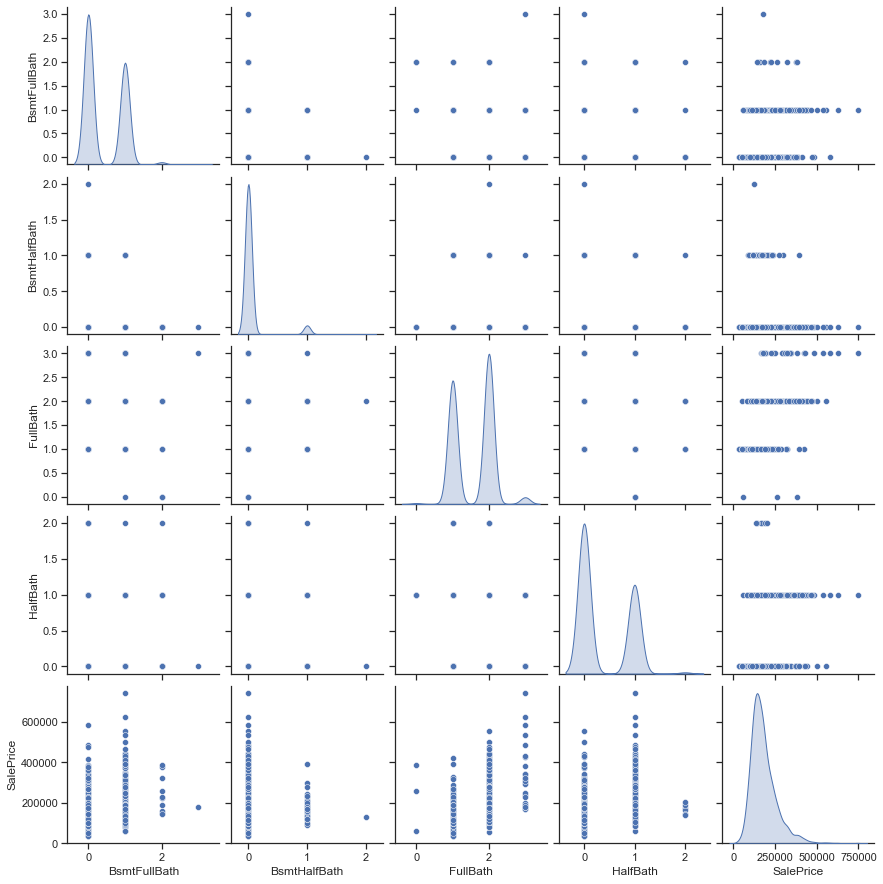

In [25]:
sns.set_theme(style="ticks")
sns.pairplot(num_df,  
             vars=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice'],
             diag_kind='kde')

- `BsmtFullBath`, `BsmtHalfBath` and `HalfBath` do not really influence the `SalePrice` since price is as high when there is none (0) of these features.
- **`FullBath`** influence the `SalePrice`. When there are more `FullBath`, the `SalePrice` gets higher.
*********************************************************

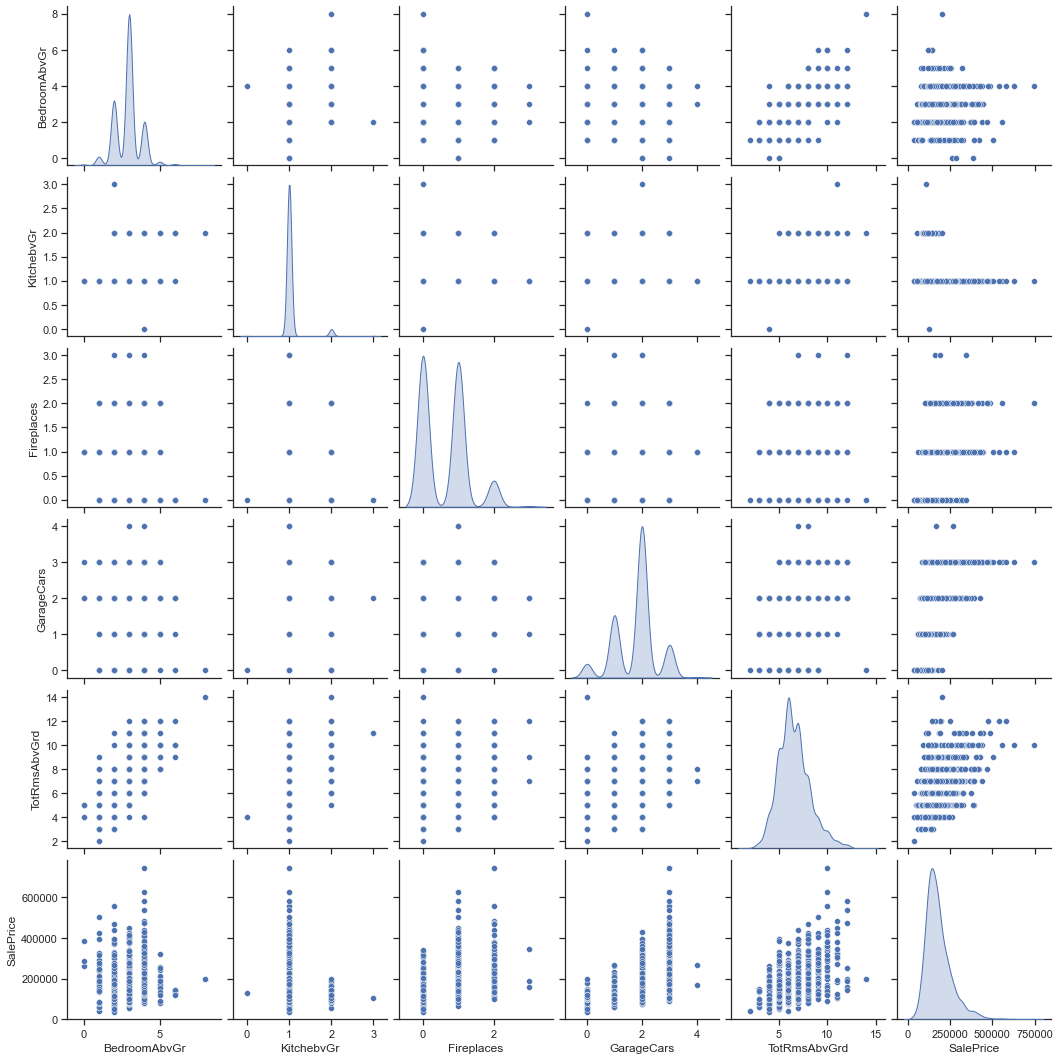

In [26]:
sns.pairplot(num_df,  
             vars=['BedroomAbvGr', 'KitchebvGr', 'Fireplaces', 'GarageCars', 'TotRmsAbvGrd', 'SalePrice'], 
             diag_kind='kde')

- At first glance, `BedroomAbvGr` seems to influence the `SalePrice` but the price actually decrease when there are more than 4 bedrooms.
- As long as there is one (1) 'KitchebvGr`,the `SalePrice` is high so this feature had not much influence.  
- At first glance, `Fireplaces` seem to influence the `SalePrice` slightly but not significant enough to be considered.
- **`GarageCArs`** and **`TotRmsAbvGrd`** shows influences to the `SalePrice`. When there are more of these features the `SalePrice` gets higher.
*********************************************************

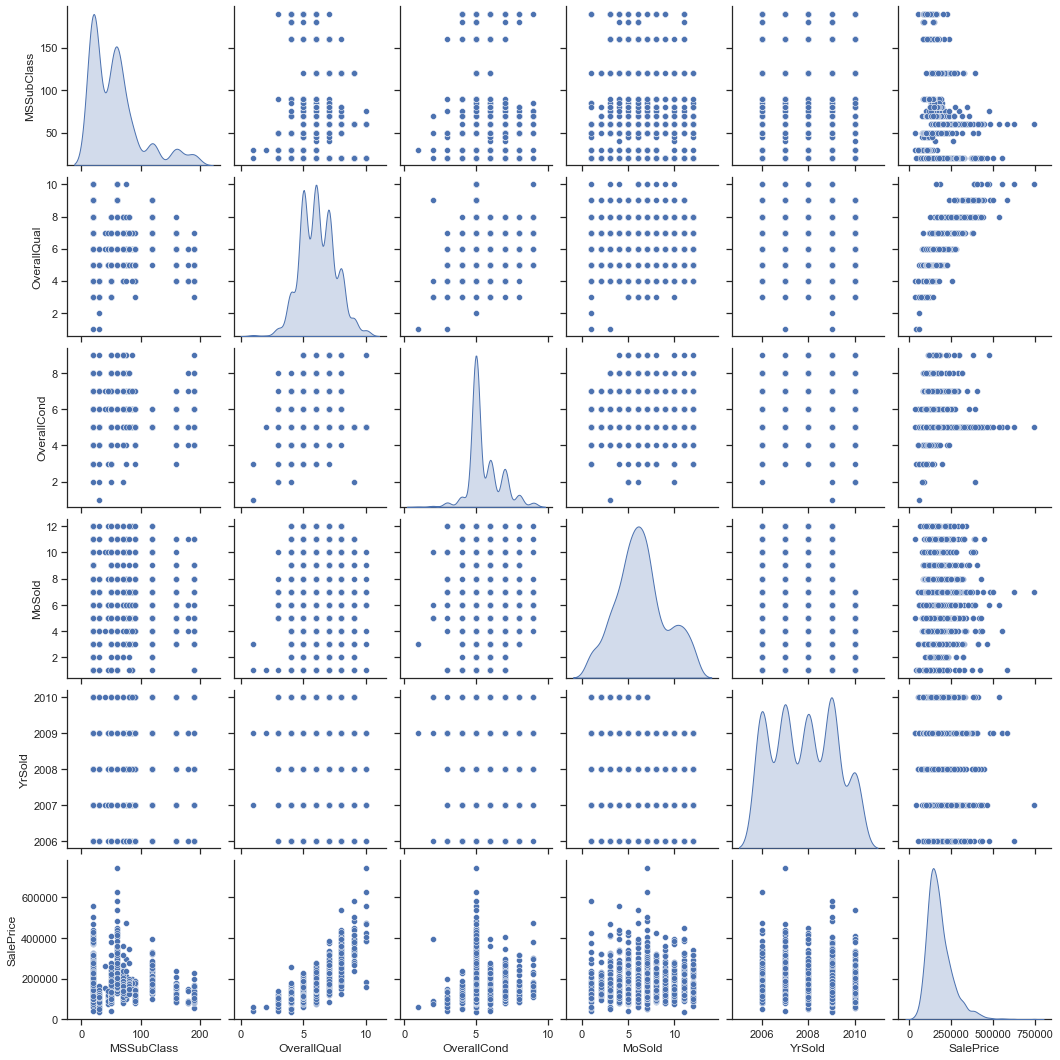

In [27]:
sns.pairplot(num_df,  
             vars=['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold', 'SalePrice'], 
             diag_kind='kde')

- `MSSubClass`, `Mosold` and `YrSold` do not show much influence to the `SalePrice`.
- At first glance `OverallCond` seems to have some influence to the `SalePrice`. However the price is highest when the overall condition rating is at 5 (the median value). 
- **`OverallQual`** greatly influence the `SalePrice`. The `SalePrice` increases when the `OverallQual` rating increases.
*********************************************************

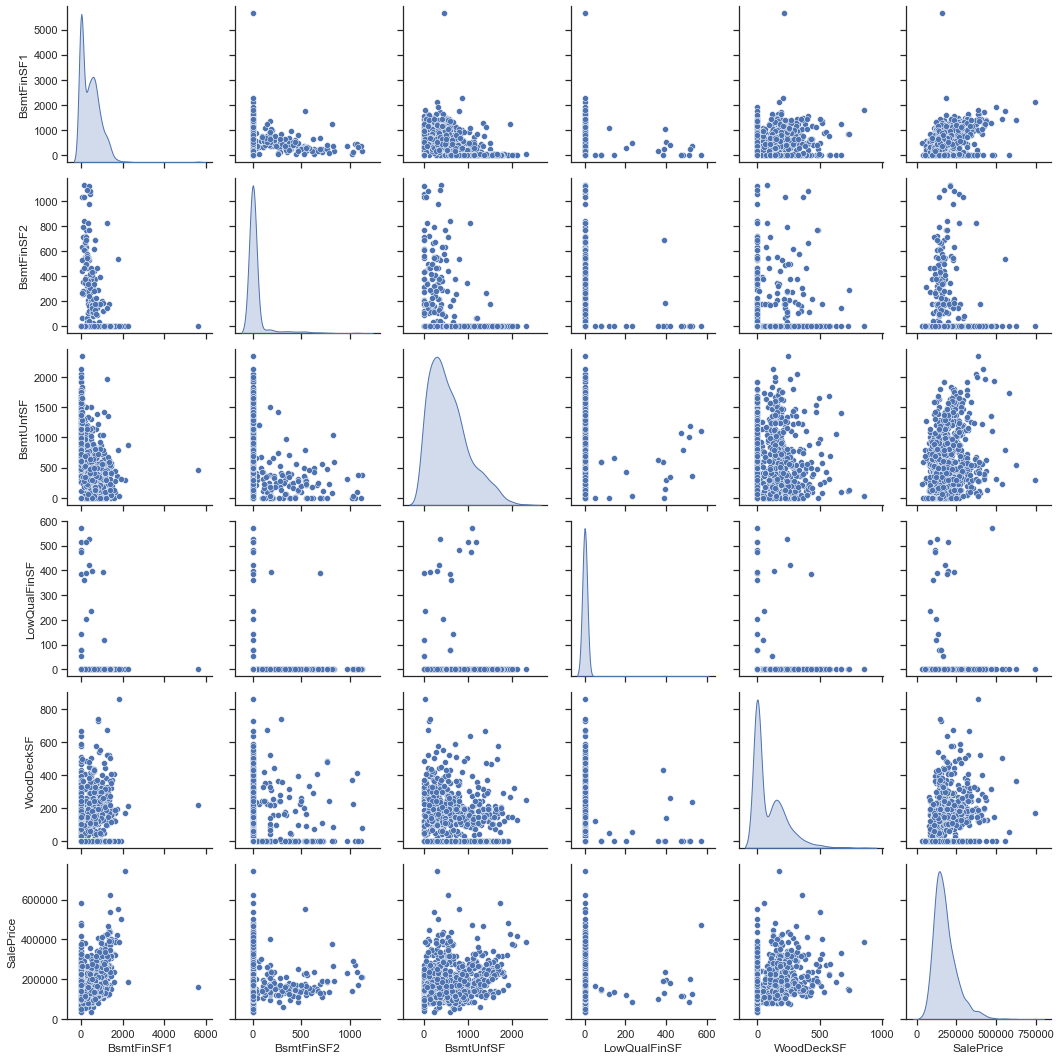

In [28]:
sns.pairplot(num_df,  
             vars=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'WoodDeckSF', 'SalePrice'], 
             diag_kind='kde')

`BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `LowQualFinDF` and `WoodDeckSF` do not show much influence to the `SalePrice`.
*********************************************************

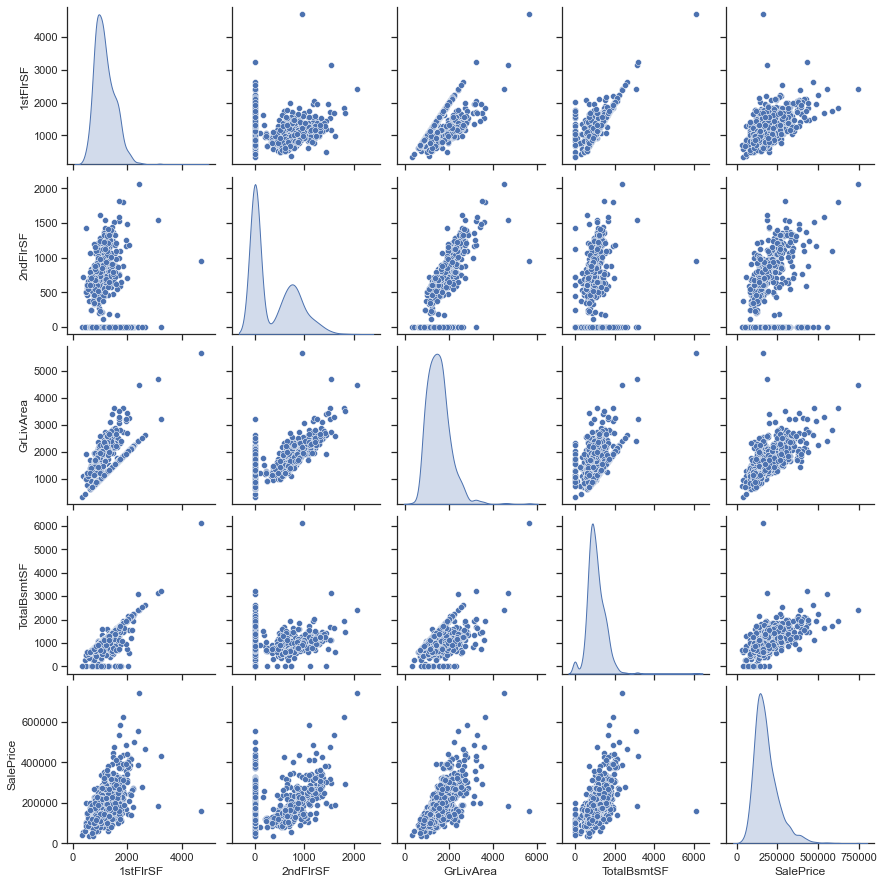

In [29]:
sns.pairplot(num_df,  
             vars=['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'SalePrice'], 
             diag_kind='kde')

- `1stFinSF`, `2ndFinSF` and `TotalBsmtSF` do not show much influence to the `SalePrice`.
- **`GrLivArea`** show high influence to the `SalePrice`. Although there are some outliers.
*********************************************************

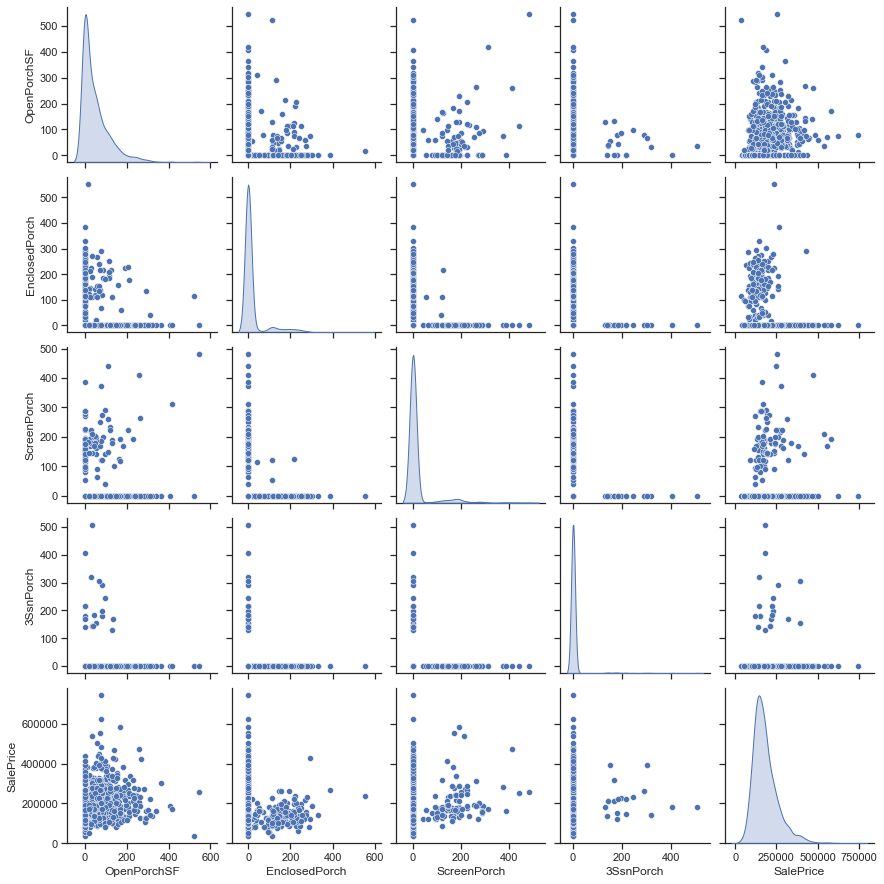

In [30]:
sns.pairplot(num_df,  
             vars=['OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', '3SsnPorch', 'SalePrice'], 
             diag_kind='kde')

`OpenPorchSF`, `EnclosedPorch`, `ScreenPorch` and `3SsnPorch` do not show much influence to the `SalePrice`.
*********************************************************

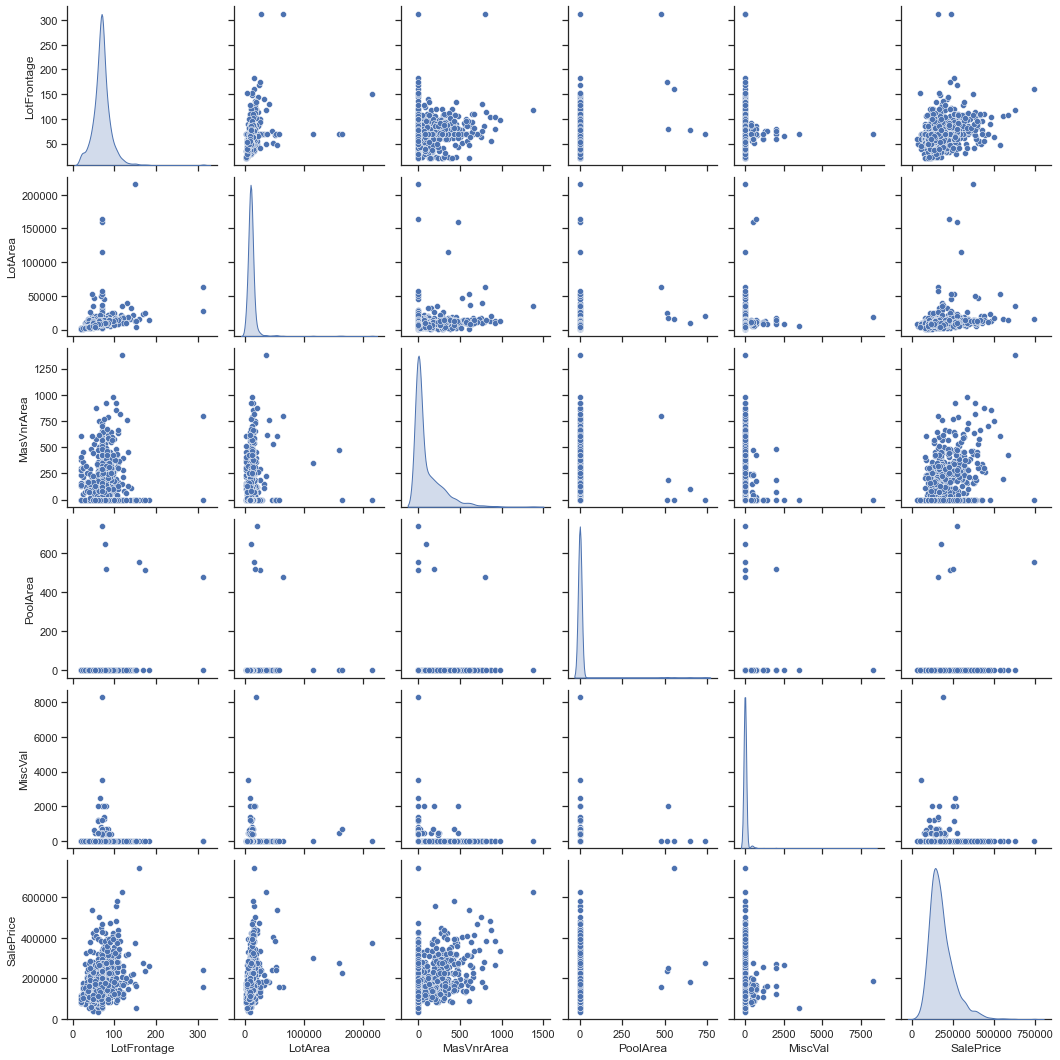

In [31]:
sns.pairplot(num_df,  
             vars=['LotFrontage', 'LotArea', 'MasVnrArea', 'PoolArea', 'MiscVal', 'SalePrice'], 
             diag_kind='kde')

`LotFrontage`, `LotArea`, `MasVnrArea`, `PoolArea` and `MiscVal` do not show influence to the `SalePrice`.
*********************************************************

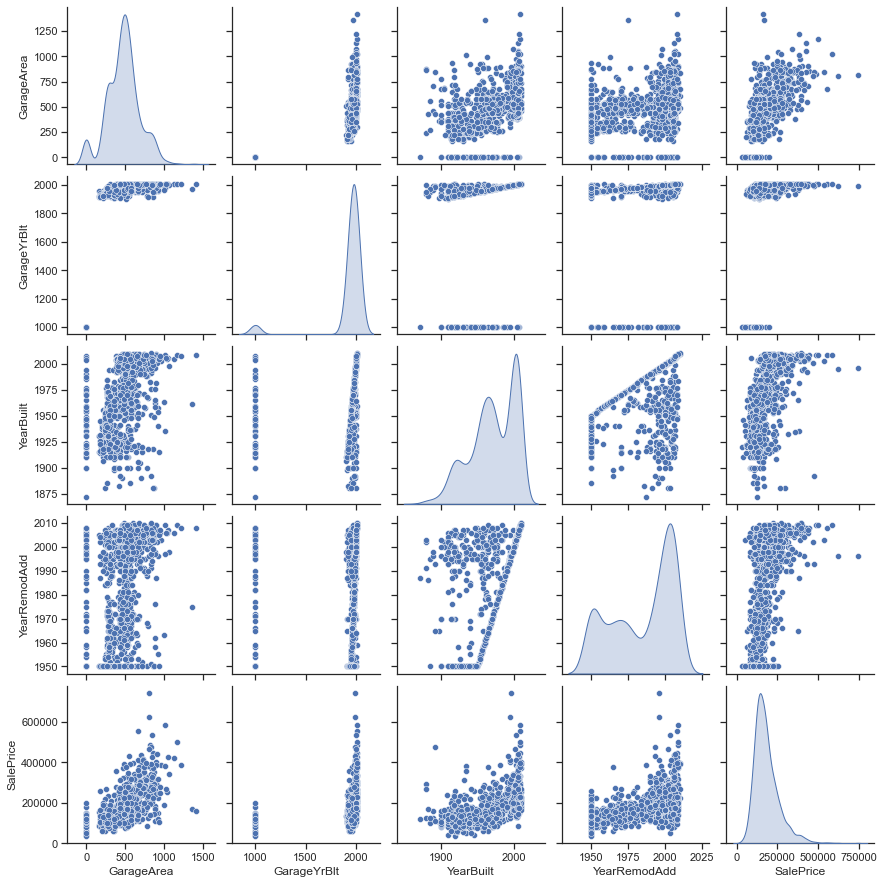

In [32]:
sns.pairplot(num_df,  
             vars=['GarageArea', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'SalePrice'], 
             diag_kind='kde')

- `GarageYrBlt` does not show any influence to the `SalePrice`.
- **`GarageArea`**, **`YearBuilt`** and **`YearRemodAdd`** show influence to the `SalePrice`.
*********************************************************

#### 4. EDA of categorical variables
   a. Missing value treatment  
   b. Count plot and box plot for bivariate analysis  
   c. Identify significant variables using p-values and Chi-Square values

#### 4.a &nbsp; Missing value treatment
- 16 categorical features: [`Alley`], [`MasVnrType`], [`BsmtQual`], [`BsmtCond`], [`BsmtExposure`], [`BsmtFinType1`], [`BsmtFinType2`], [`Electrical`], [`FireplaceQu`], [`GarageType`], [`GarageFinish`], [`GarageQual`], [`GarageCond`], [`PoolQC`], [`Fence`],[`MiscFeature`]

- Use the `CategoricalImputer` from the `feature_engine.imputation` package.
- Impute the categorical missing value with the the default value of *'Missing'*
- Validate that all missing values had been treated.

In [33]:
# Categorical imputation for Missing values
from feature_engine.imputation import CategoricalImputer

cat_imputer = CategoricalImputer()
cat_imputer.fit(categorical_df)

categorical_df = cat_imputer.transform(categorical_df)
cat_val_df = cat_imputer.transform(cat_val_df)

In [34]:
# Validate that all missing value had been handled
categorical_df.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
Fence            0
SaleType         0
SaleCondition    0
dtype: int64

*********************************************************
#### 4.b &nbsp; Count plot and box plot for bivariate analysis
- Display the countplot and boxplot for each categorical features
- For the boxplot, the bivariate values used for analysis are the feature against the `SalePrice`
- Add the `SalePrice` to the dataset and save as `cat_df` since we need this value in the dataset for the boxplot

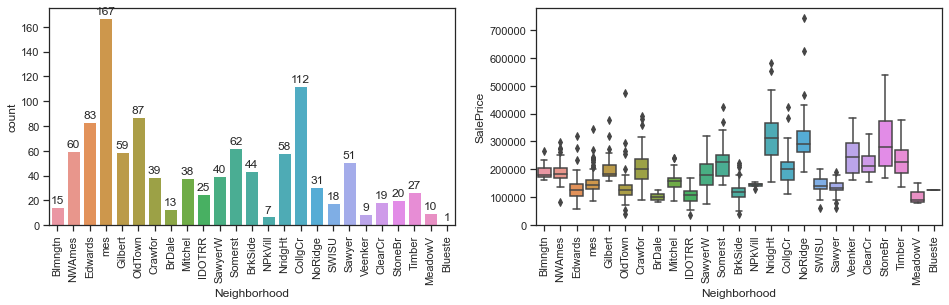

In [35]:
# Add the 'SalesPrice' back to the dataset to use in the bivariate analysis
cat_df = categorical_df.copy()
cat_df['SalePrice'] = y_train

# Countplot and boxplot for specified feature in 1 row
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Get the list of unique values to use as x label for the plots
x_label = list(cat_df['Neighborhood'].unique())

# Display the counterplot on the 1st axes on the left
ax1 = sns.countplot(x='Neighborhood', data=cat_df, ax=axes[0])
ax1.set_xticklabels(labels=x_label, rotation=90)

# Print number of count on the countplot 
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 

# Display the bivariate boxplot on the 2nd axes on the right
ax2 = sns.boxplot(x="Neighborhood", y="SalePrice", data = cat_df, ax=axes[1])
ax2.set_xticklabels(labels=x_label, rotation=90)

plt.show()

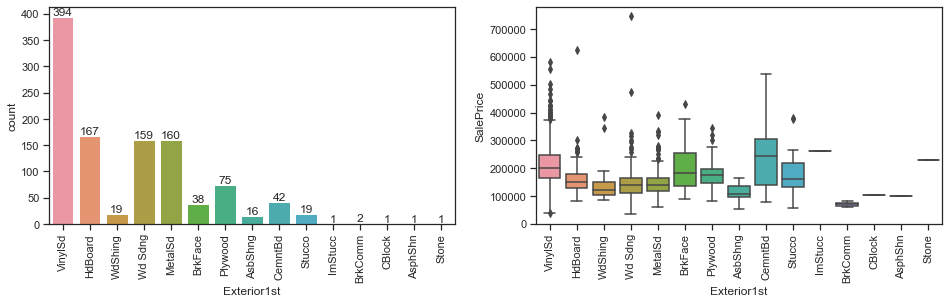

In [36]:
# Countplot and boxplot for specified feature in 1 row
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Get the list of unique values to use as x label for the plots
x_label = list(cat_df['Exterior1st'].unique())

# Display the counterplot on the 1st axes on the left
ax1 = sns.countplot(x='Exterior1st', data=cat_df, ax=axes[0])
ax1.set_xticklabels(labels=x_label, rotation=90)

# Print number of count on the countplot 
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 

# Display the bivariate boxplot on the 2nd axes on the right
ax2 = sns.boxplot(x="Exterior1st", y="SalePrice", data = cat_df, ax=axes[1])
ax2.set_xticklabels(labels=x_label, rotation=90)

plt.show()

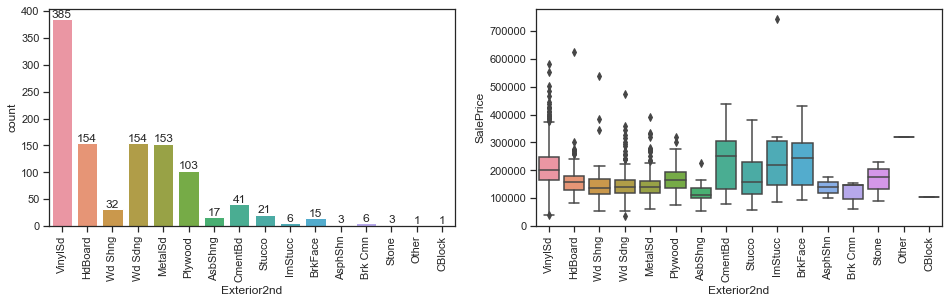

In [37]:
# Countplot and boxplot for specified feature in 1 row
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Get the list of unique values to use as x label for the plots
x_label = list(cat_df['Exterior2nd'].unique())

# Display the counterplot on the 1st axes on the left
ax1 = sns.countplot(x='Exterior2nd', data=cat_df, ax=axes[0])
ax1.set_xticklabels(labels=x_label, rotation=90)

# Print number of count on the countplot 
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 

# Display the bivariate boxplot on the 2nd axes on the right
ax2 = sns.boxplot(x="Exterior2nd", y="SalePrice", data = cat_df, ax=axes[1])
ax2.set_xticklabels(labels=x_label, rotation=90)

plt.show()

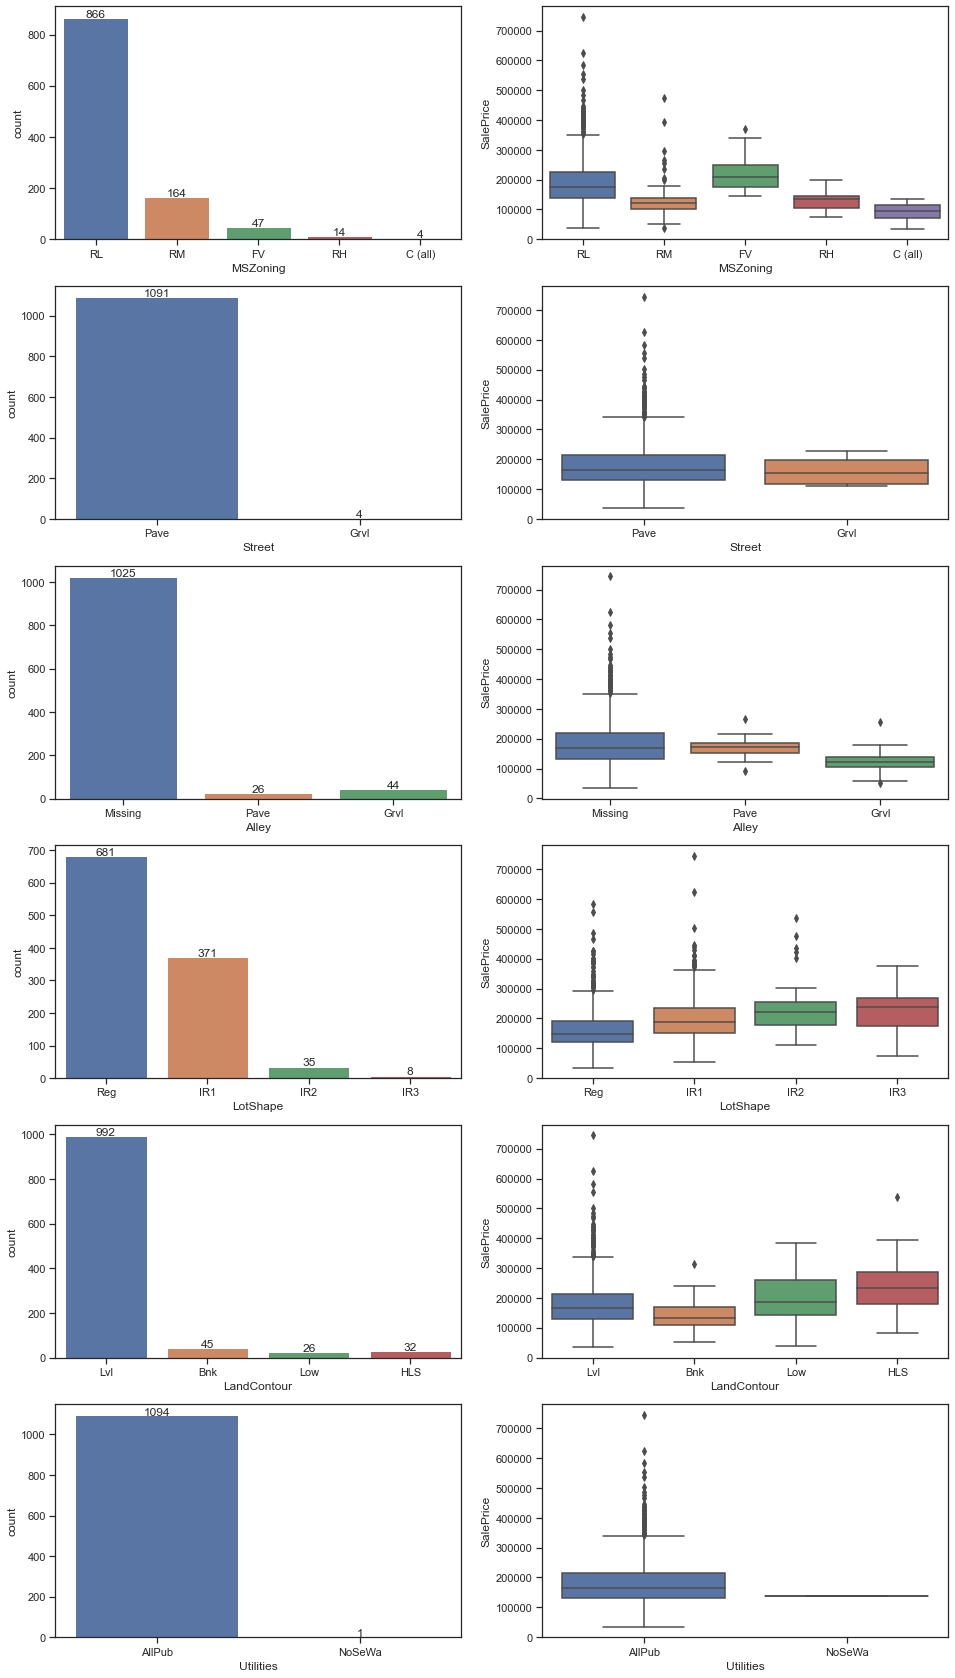

In [38]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['MSZoning', 'Street', 'Alley', 
       'LotShape', 'LandContour', 'Utilities']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

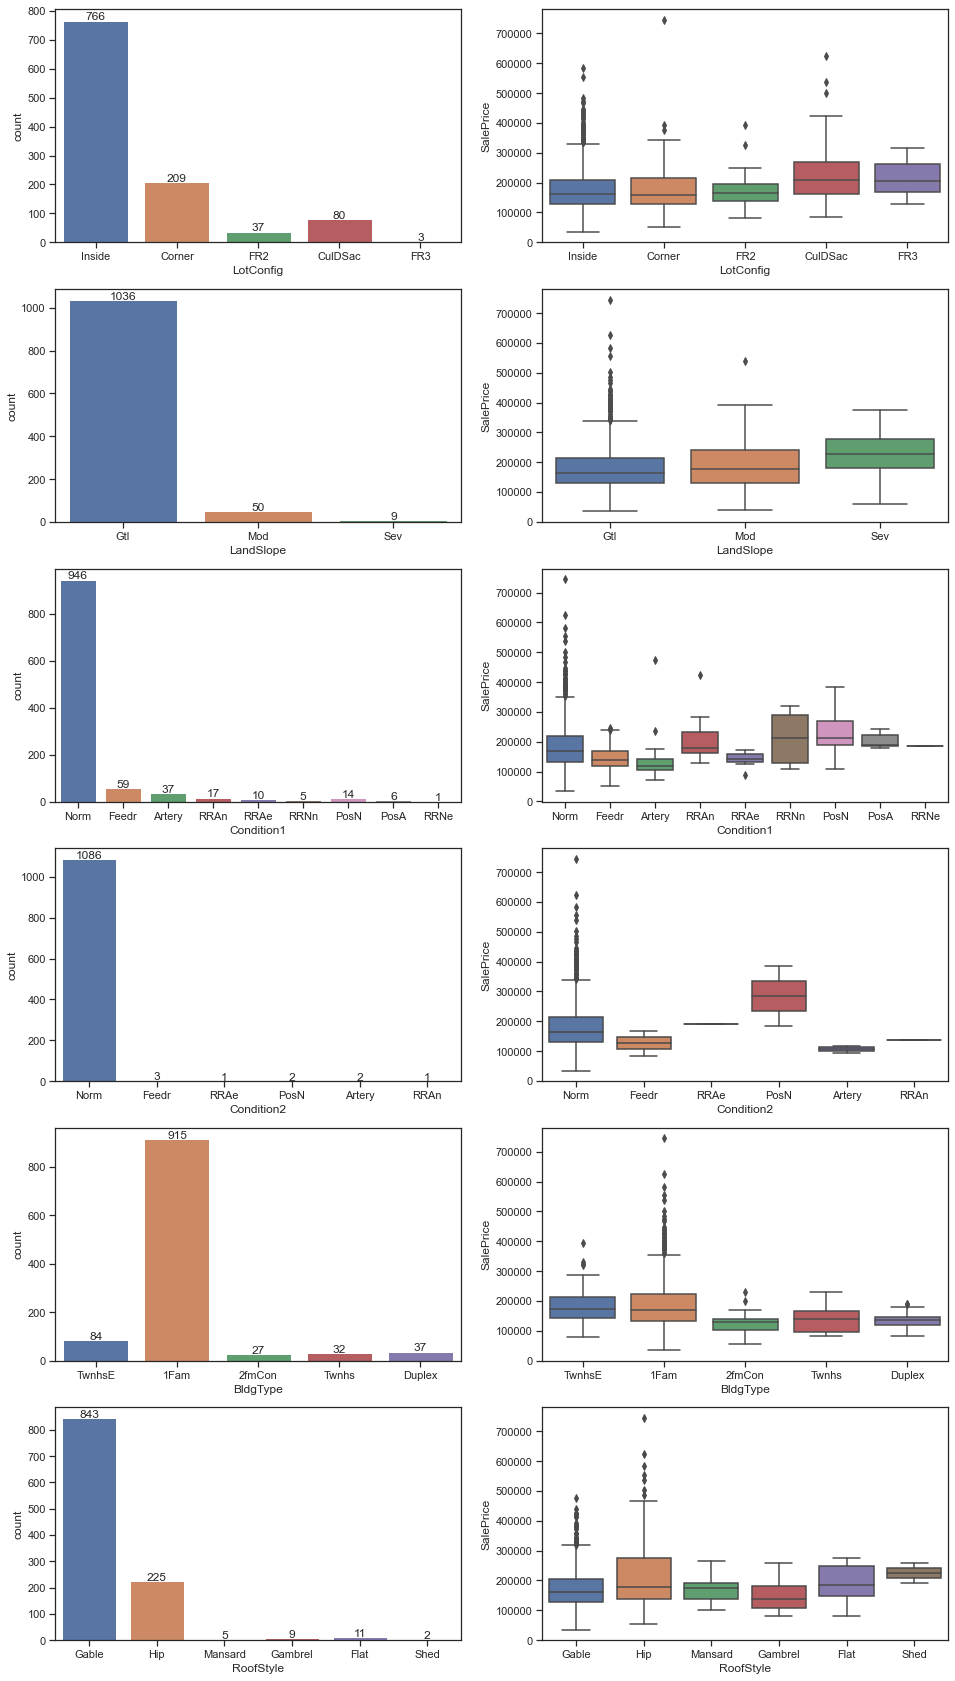

In [39]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['LotConfig', 'LandSlope', 'Condition1',
       'Condition2', 'BldgType', 'RoofStyle']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
    
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

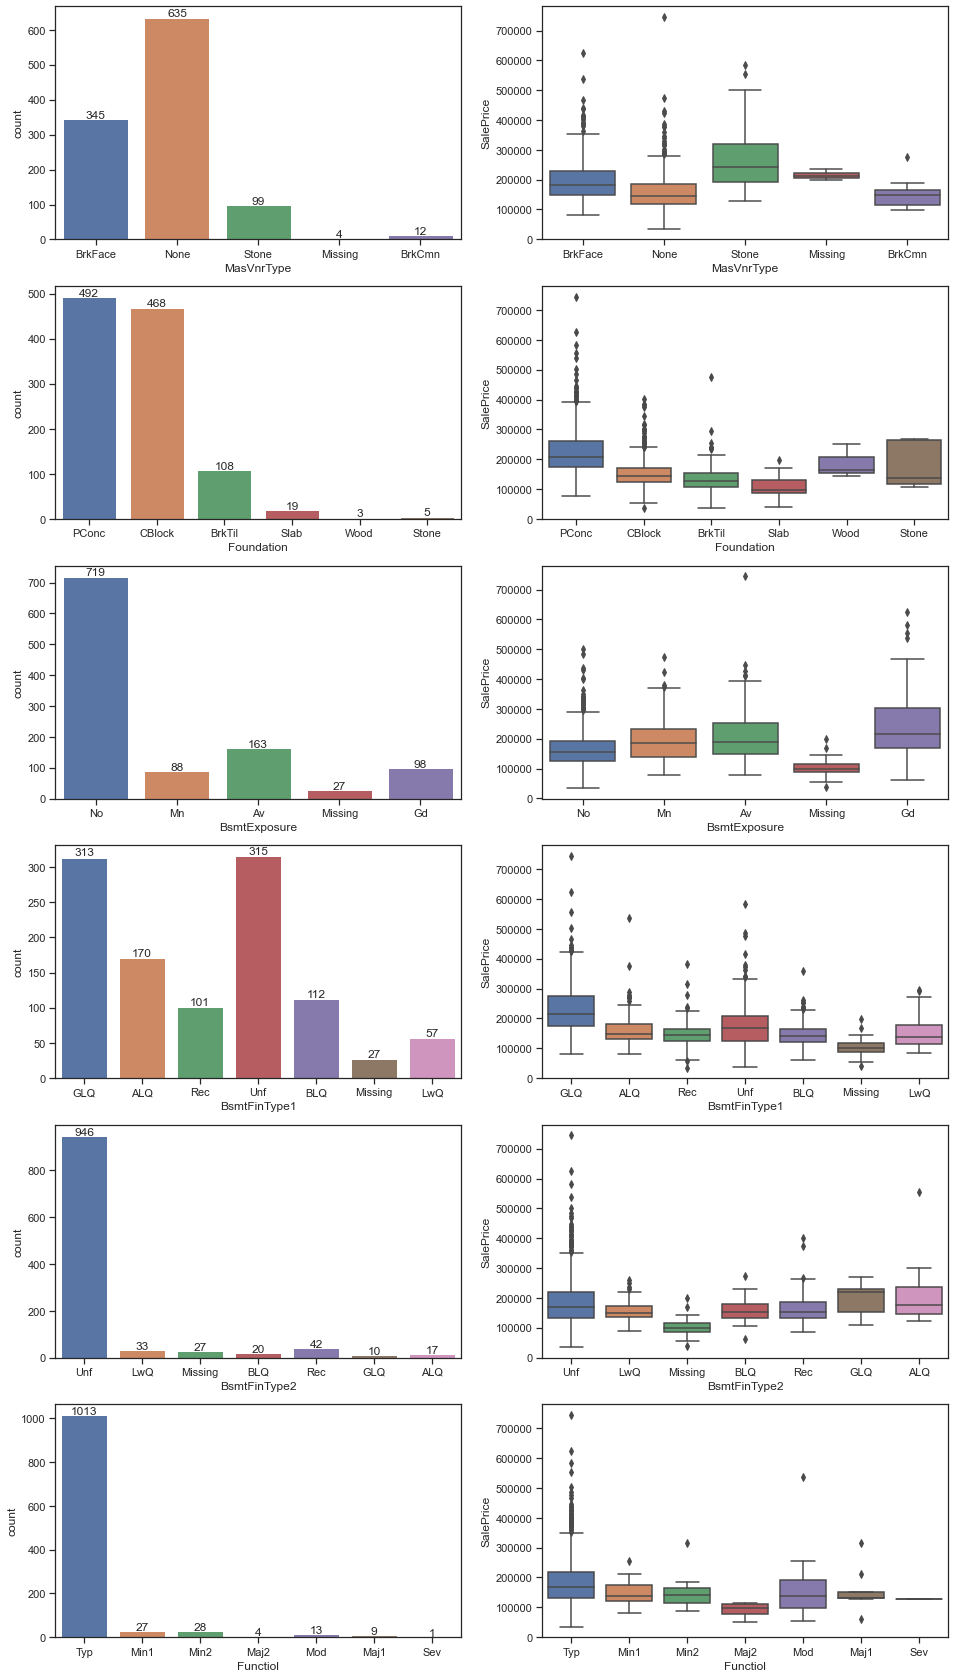

In [40]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Functiol']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

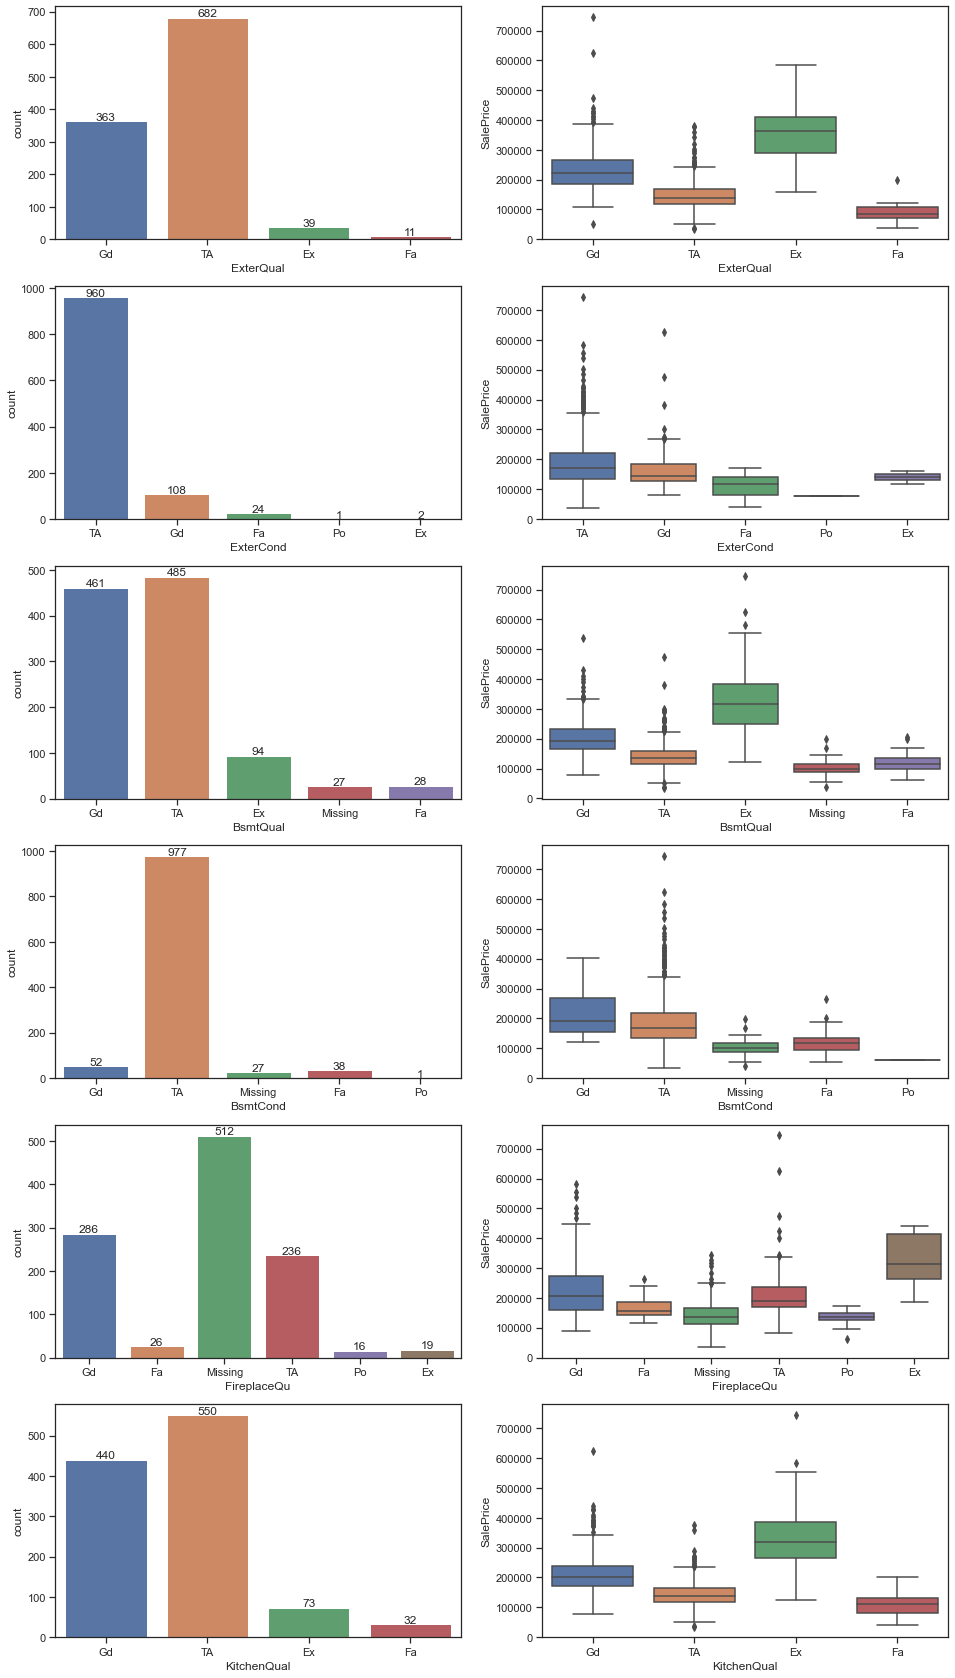

In [41]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'FireplaceQu', 'KitchenQual']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

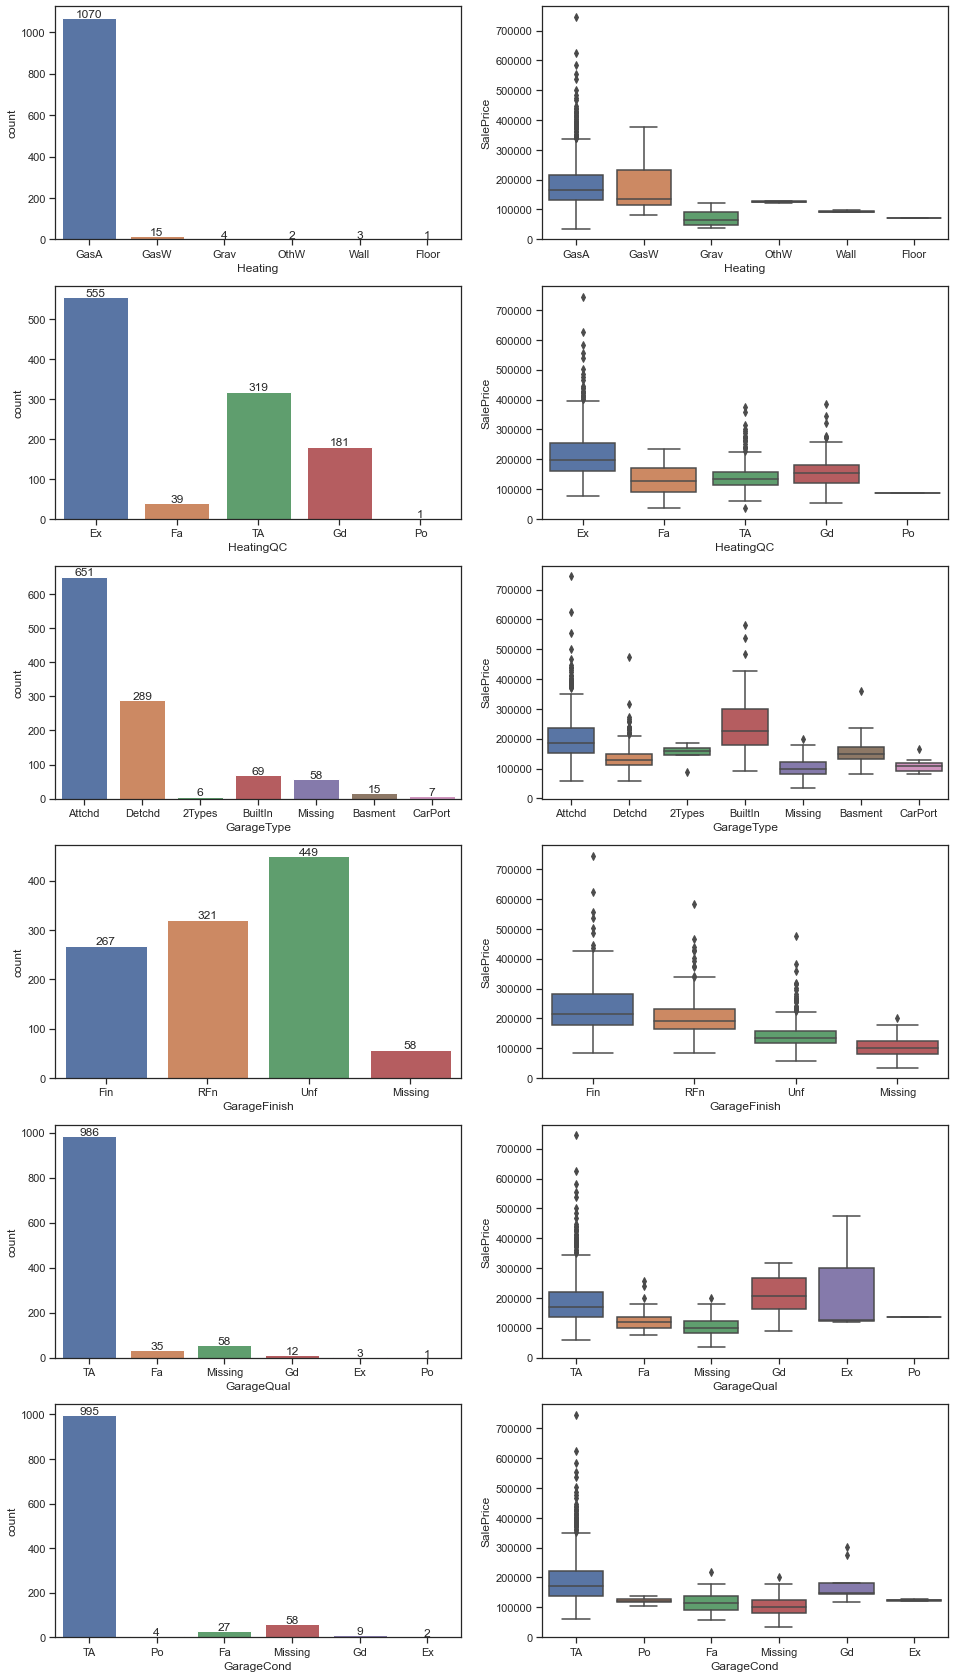

In [42]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['Heating', 'HeatingQC', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

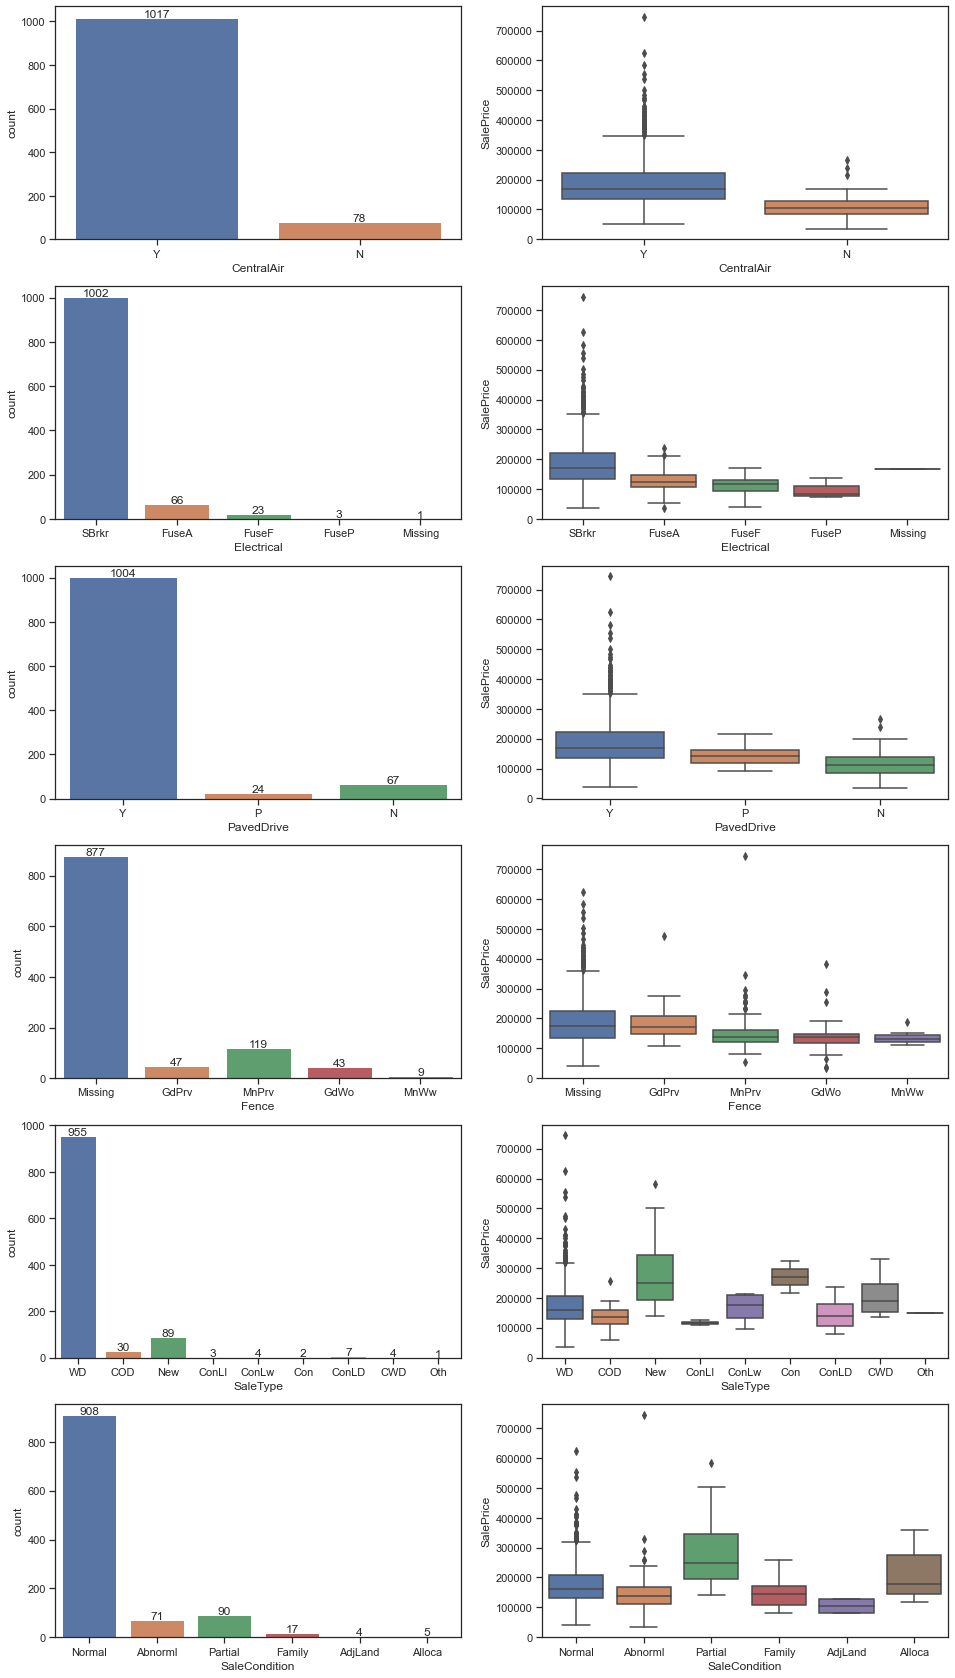

In [43]:
# Countplot and boxplot for the 6 specified features in 6 rows
fig, axes = plt.subplots(6, 2, figsize=(16, 30))

# The list of features (variable) to plot
col = ['CentralAir', 'Electrical', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(6):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

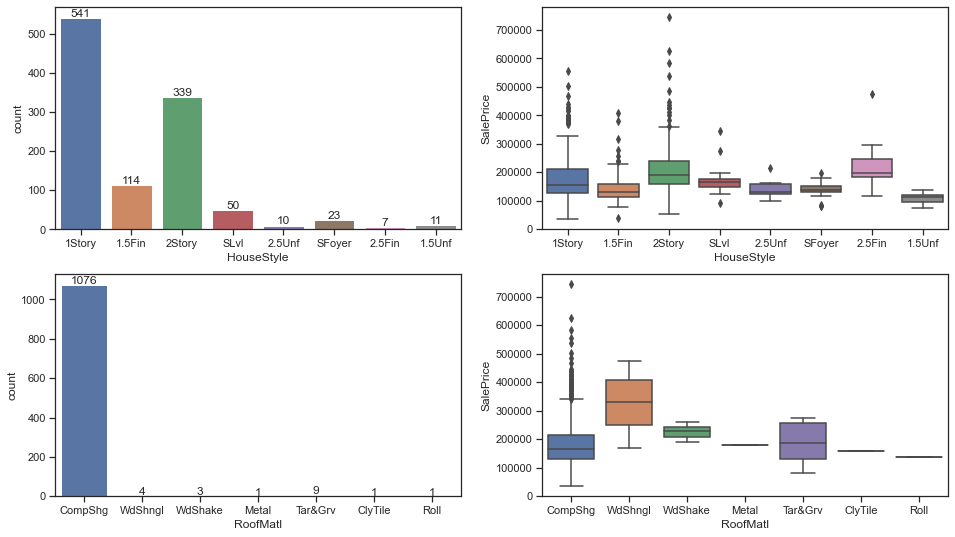

In [44]:
# Countplot and boxplot for the 2 specified features in 2 rows
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# The list of features (variable) to plot
col = ['HouseStyle', 'RoofMatl']

# Loop through the list to generate countplot on the left and boxplot with bivariate value (feature and SalePrice)
cindex = 0
for axis in range(2):
    ax1 = sns.countplot(x=col[cindex], data=cat_df, ax=axes[axis, 0])
    ax2 = sns.boxplot(x=col[cindex], y='SalePrice', data=cat_df, ax=axes[axis, 1])
        
    # Print number of count on the countplot 
    for p in ax1.patches:
        ax1.text(p.get_x() + p.get_width()/2., p.get_height() + 3, f'{p.get_height()}', ha='center') 
    
    cindex += 1

In [45]:
#print('_' * 95)
#for col in categorical_df.columns:
#    print(categorical_df[col].value_counts())
#    print('_' * 95)

*********************************************************
#### 4.c &nbsp; Identify significant variables using p-values and Chi-Square values
- Use the `chi2_contingency` function from the `scipy.stats` package to get the Chi-Square test results.
- First, we need to use the `pandas.crosstab()` function to create a contingency table for the `SalePrice` and the feature.
- Then, pass the contingency table returned from the `.crosstab()` function as parameter to the `chi2_contingency()` function.
- The significance level is set to 0.05. 
- If the probability value from the Chi-Square contingency test is lesser or equal to the significance level, it is considered that there is dependency between the feature and the `SalePrice` (target variable).
- The list of significant variables with its Chi-Square and Probability values are displayed.

In [46]:
# Use the chi2_contingency function from scipy.stats to find the Chi-Square values
from scipy.stats import chi2_contingency

# Get the list of column names from the dataframe
col_list = cat_df.columns.to_list()
cat_list = []

print('\033[1m', ' '*4, 'Significant variables identified using Chi-Square and p-values:')
print('Significant Variables', '\t'*2, 'Chi-Square', '\t'*3, 'Probability', '\033[0m')

# Set the significance level as 'alpha'
alpha = 0.05

# Loop through each features to get the crosstab contingency table to use in the chi2_contingency function
for col in col_list[:-1]:
    contigency = pd.crosstab(cat_df['SalePrice'], cat_df[col])
    chi2, p, dof, expected = chi2_contingency(contigency)
    
    # Print the result of the Chi-Square and Probability returned from the chi2_contingency() function
#    print(col,  '\t\tChi-square: ', chi2, '\t', ' '*2, 'probability: ', '{:.10f}'.format(p))

    # if probability p is <= the significance level, there is dependency between feature and SalePrice 
    if p <= alpha:
        print(col, '\t'*3, chi2, '\t'*2, '{:.10f}'.format(p))
        
        # Save the significant variables to a list
        cat_list.append(col)

      Significant variables identified using Chi-Square and p-values:
Significant Variables 		 Chi-Square 			 Probability 
MSZoning 			 2515.7918178728487 		 0.0000010830
Street 			 659.9733615948671 		 0.0006296445
LotShape 			 1994.0164391578046 		 0.0000000037
LandSlope 			 1223.5244608639255 		 0.0036718016
Neighborhood 			 14097.038008994225 		 0.0000000026
MasVnrType 			 2629.2564451026556 		 0.0000000002
ExterQual 			 2149.9679520174723 		 0.0000000000
ExterCond 			 2551.6064577446086 		 0.0000000854
Foundation 			 2939.4340008557097 		 0.0033938927
BsmtQual 			 2752.9047924822185 		 0.0000000000
BsmtCond 			 2943.97270187909 		 0.0000000000
BsmtExposure 			 2605.7191566172087 		 0.0000000012
Heating 			 3403.0687824506754 		 0.0000000000
CentralAir 			 648.0882497022303 		 0.0018311556
KitchenQual 			 2212.664884977712 		 0.0000000000
FireplaceQu 			 3118.381509489028 		 0.0000003375
GarageFinish 			 1939.1185307810274 		 0.0000004115
SaleCondition 			 3090.2231639369784 		 0.0

*********************************************************
#### 5. Combine all the significant categorical and numerical variables
- Get the subset of data using the list of numerical significant variables from the numerical dataframe.
- Get the subset of data using the list of categorical significant variables from the categorical dataframe
- Merge the categorical and numerical significant variables datasets using the `pandas.merge()` function. 
- Since the categorical and numerical dataset had been splitted from the same dataset, we can merge them back using the dataframe `index`.
- Merge the transformed validation back as well.
- Use the `dataframe.head()` to validate that the data is still intact and the number of columns merged is correct.

In [47]:
# Significant numerical variables
num_list = ['TotalBsmtSF', 'GrLivArea', 'GarageCars', 'YearBuilt', 'OverallQual', 'FullBath']
num_significant_df = num_df[num_list]

# Significant categorical variables
cat_significant_df = cat_df[cat_list]

# Merge the significant categorical and numerical variables using its index
X_train_df = pd.merge(cat_significant_df, num_significant_df, left_index=True, right_index=True)

# Merge the significant categorical and numerical variables for the validation dataset using its index
num_sig_val_df = num_val_df[num_list]
cat_sig_val_df = cat_val_df[cat_list]
X_val_df = pd.merge(cat_sig_val_df, num_sig_val_df, left_index=True, right_index=True) 

# Check the merge. There should be 18 categorical and 6 numerical (total 24) columns
X_train_df.head()

MSZoning Street LotShape LandSlope Neighborhood MasVnrType ExterQual  \
1023       RL   Pave      Reg       Gtl      Blmngtn    BrkFace        Gd   
810        RL   Pave      Reg       Gtl       NWAmes    BrkFace        TA   
1384       RL   Pave      Reg       Gtl      Edwards       None        TA   
626        RL   Pave      IR1       Gtl          mes       None        TA   
813        RL   Pave      Reg       Gtl          mes    BrkFace        TA   

     ExterCond Foundation BsmtQual  ... KitchenQual FireplaceQu GarageFinish  \
1023        TA      PConc       Gd  ...          Gd          Gd          Fin   
810         TA     CBlock       TA  ...          Gd          Fa          RFn   
1384        TA     BrkTil       TA  ...          TA     Missing          Unf   
626         TA     CBlock       TA  ...          TA          TA          RFn   
813         TA     CBlock       TA  ...          TA     Missing          RFn   

     SaleCondition TotalBsmtSF GrLivArea GarageCars YearBuilt  OverallQual  \
1023        Normal        1346      1504          2      2005            7   
810         Normal        1040      1309          2      1974            6   
1384        Normal         560      1258          1      1939            6   
626         Normal         978      1422          1      1960            5   
813         Normal        1442      1442          1      1958            6   

      FullBath  
1023         2  
810          1  
1384         1  
626          1  
813          1  

[5 rows x 24 columns]

*********************************************************
#### 6. Plot box plot for the new dataset to find the variables with outliers
- Use the `dataframe.describe()` to view the statistical information for the new dataset.
- Plot the boxplot for the numerical variables to check for outliers.

In [48]:
X_train_df.describe()

TotalBsmtSF    GrLivArea   GarageCars    YearBuilt  OverallQual  \
count   1095.00000  1095.000000  1095.000000  1095.000000  1095.000000   
mean    1060.76347  1531.213699     1.784475  1971.107763     6.129680   
std      443.87948   527.197908     0.733836    30.605697     1.366746   
min        0.00000   334.000000     0.000000  1872.000000     1.000000   
25%      795.50000  1148.000000     1.000000  1953.500000     5.000000   
50%      996.00000  1478.000000     2.000000  1972.000000     6.000000   
75%     1299.50000  1795.000000     2.000000  2001.000000     7.000000   
max     6110.00000  5642.000000     4.000000  2010.000000    10.000000   

          FullBath  
count  1095.000000  
mean      1.578995  
std       0.544976  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max       3.000000

- The `max` for `TotalBsmtSF` is 6110 while its `mean` is 1060.76. The fact that the `mean` is so small compared to the `max` value indicates that the `max` value is an outlier.
- The `max` for `GrLivArea` is 5642 while its `mean` is 1531. The fact that the `mean` is so small compared to the `max` value indicates that the `max` value is an outlier.
- The `max` for `GarageCars` is 4, its `mean` is 1.78 and its `median` is 2.0. The fact that the difference between the `mean` and `median is so small indicates that there is likely no an outlier for this feature.
- The `max` for `YearBuilt` is 2010, its `mean` is 1971 and its `median` is 1972. The fact that the difference between the `mean` and `median is so small indicates that there is likely no an outlier for this feature.
- The `max` for `OverallQual` is 10, its `mean` is 6.13 and its `median` is 6.0. The fact that the difference between the `mean` and `median is so small indicates that there is likely no an outlier for this feature.
- The `max` for `OverallQual` is 10, its `mean` is 6.13 and its `median` is 6.0. The fact that the difference between the `mean` and `median is so small indicates that there is likely no an outlier for this feature.
- The `max` for `FullBath` is 3, its `mean` is 1.58 and its `median` is 2.0. The fact that the difference between the `mean` and `median is so small indicates that there is likely no an outlier for this feature.

*********************************************************
##### Plot the boxplot for the numerical significant variables to check if there is any variables with outliers 

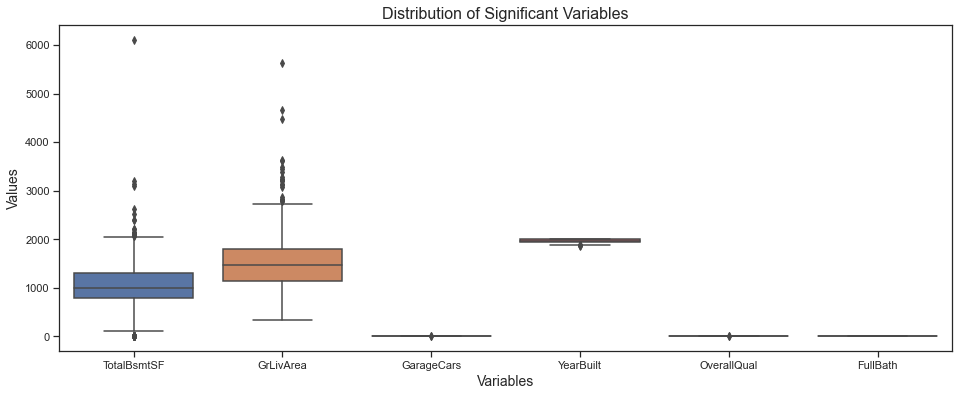

In [49]:
plt.figure(figsize=(16, 6))
boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(X_train_df[num_list]))
boxplot.axes.set_title("Distribution of Significant Variables", fontsize=16)
boxplot.set_xlabel("Variables", fontsize=14)
boxplot.set_ylabel("Values", fontsize=14)
plt.show()

The boxplot above showed that there is outliers for the variables `TotalBsmtSF` and `GrLivArea`.

In [ ]:
# IGNORE the rest of the code
# cat_final_df = X_train_df[cat_list]
# cat_final_df = pd.merge(cat_final_df, y_train, left_index=True, right_index=True)

# cat_final_df.head()

In [ ]:
# IGNORE 
# To view the bivarate analysis between the categorical variables and the target variable.
# cat_final_df = X_train_df[cat_list]
# cat_final_df = pd.merge(cat_final_df, y_train, left_index=True, right_index=True)

# col_len = len(cat_list)

# # Plot Boxplot for each features
# fig, axes = plt.subplots(6, 2, figsize=(16, 50))

# col_index = 0

# for axis in range(6):
#     for i in range(2):
#         col = cat_list[col_index]
#         col_index += 1
    
#         if col == 'Neighborhood':
#             x_label = list(cat_final_df[col].unique())
#             ax = sns.boxplot(x=col, y='SalePrice', data=cat_final_df, ax=axes[axis, i])
#             ax.set_xticklabels(labels=x_label, rotation=90)
#         else:
#             ax = sns.boxplot(x=col, y='SalePrice', data=cat_final_df, ax=axes[axis, i])

# plt.show()

<b>Note:</b> The last two points are performed to make the new dataset ready for training and prediction.